# 1. Introduction
 

**Dataset Used:** Wine  

These data are the results of a **chemical analysis** of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the **quantities of 13 constituents** found in each of the three types of wines.  

The dataset includes **13 attributes** and **1 output attribute** ("Target").  
The **178 instances** have been classified into one of **3 different classes** based on who produced the wine.  

---

## Attribute Information  

| **#** | **Attribute Name**                     |
|----|--------------------------------|
| 1  | **Target** (Wine class)       |
| 2  | Alcohol                       |
| 3  | Malic acid                    |
| 4  | Ash                           |
| 5  | Alcalinity of ash             |
| 6  | Magnesium                     |
| 7  | Total phenols                 |
| 8  | Flavanoids                    |
| 9  | Nonflavanoid phenols          |
| 10 | Proanthocyanins               |
| 11 | Color intensity               |
| 12 | Hue                           |
| 13 | OD280/OD315 of diluted wines  |
| 14 | Proline                       |

---

## Problem to Solve  

The goal is to develop a **classification model** and primary goals are:

- To develop a robust machine learning model that can accurately classify wines based on chemical properties.  
- Understand the relationship between chemical variables and their role in wine classification.  
- To identify which chemicals are most significant in distinguishing between the 3 classes of wines.  

---

## Possible Implications

By developing a reliable and trained classification model, it can be used to:
* Contribute to the field of chemometrics
* Provide insights into wine authentication methods
* Demonstrate the power of data science in understanding complex biological products

---

## Ethical and Scientific Considerations
This research maintains scientific integrity by:
* Using an objective, data-driven approach
* Employing rigorous statistical and machine learning methodologies
* Providing transparent analysis and interpretation of results



# 2. Data Description and Exploratory Analysis

**Exploratory Data Analysis (EDA)** is the first step in understanding the wine dataset. By using Python libraries like **Pandas**, **Matplotlib**, and **Seaborn**, we can examine the **chemical features** of our wines, revealing hidden patterns.

The **main goal** of EDA is to transform raw **numerical** data into meaningful information by:
- Checking the dataset's structure
- Identifying feature distributions
- Detecting any data quality issues
- Preparing the groundwork for the classification model

Through **statistical summaries** and **visualization**, we'll uncover what makes each **wine cultivar** unique at a chemical level, setting a solid foundation for our subsequent analysis.

### Dataset Overview
The dataset contains information about different types of wines, with various **chemical properties** measured for each sample. The **Wine dataset** includes results from a **chemical analysis** of wines grown in the same region in **Italy**, but derived from **three different cultivars**.

### Dataset Properties:
- **178 samples (rows) of wine**
- **14 attributes**
- The dataset is **balanced** across the three classes:
  - **Class 1**: 59 samples
  - **Class 2**: 71 samples
  - **Class 3**: 48 samples


### Step 1: Importing all necessary libraries


In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, make_scorer
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

### Step 2: Load the Dataset

In [93]:
# Load the wine dataset from a CSV file without a header row
wine_data = pd.read_csv("wine.csv", header=None)

# Assign column names to the dataset for better readability
wine_data.columns = ['Target', 'Alcohol', 'Malic Acid', 'Ash', 'Alcanity of Ash', 'Magnesium',
                    'Total Phenols', 'Flavanoids', 'Nonflavanoid Phenols', 'Proanthocyanins', 'Colour Intensity',
                    'Hue', 'OD280/OD315 of Diluted Wines', 'Proline']

# Display the first few rows of the dataset to check if the data is loaded correctly
display(wine_data)

,Target,Alcohol,Malic Acid,Ash,Alcanity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Colour Intensity,Hue,OD280/OD315 of Diluted Wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


---

### Step 3: Check Basic Dataset Information - Wine Class 1

The five most important features in this wine dataset are:
- **Alcohol** – has the greatest impact on the quality of wine, while the smallest feature is **citric acid**. [1]
- **Total Phenols** – affect the tastes of bitterness and astringency, especially in red wine. The colour of wine is caused by **phenolics**, which are key **wine preservatives** and the basis of long aging. [2]
- **Flavonoids** – widely consumed in beverages, they have **antioxidant, anti-inflammatory, anticancer, and immunomodulatory** activities. [3]
- **Colour Intensity** – reflects the **concentration of phenolic compounds**, helping distinguish different wine types based on grape variety and composition.
- **Proline** – varies significantly between wine types, serving as a **marker** for grape variety and fermentation characteristics.


In [94]:
# Filter the data for class 1 wines
class_1_wine = wine_data[wine_data['Target'] == 1]

# Calculate the mean for specific features in class 1 wines
alc_mean1 = class_1_wine['Alcohol'].mean()
totalphenols_mean = class_1_wine['Total Phenols'].mean()
flavanoids_mean = class_1_wine['Flavanoids'].mean()
colour_mean = class_1_wine['Colour Intensity'].mean()
proline_mean = class_1_wine['Proline'].mean()

# Print the results
print("Alcohol: Mean =", round(alc_mean1, 2))
print("Total Phenols: Mean =", round(totalphenols_mean, 2))
print("Flavanoids: Mean =", round(flavanoids_mean, 2))
print("Color Intensity: Mean =", round(colour_mean, 2))
print("Proline: Mean =", round(proline_mean, 2))


Alcohol: Mean = 13.74
Total Phenols: Mean = 2.84
Flavanoids: Mean = 2.98
Color Intensity: Mean = 5.53
Proline: Mean = 1115.71


In [95]:
# Print the range (min and max) for the specified features in class 1 wines
print(f"Alcohol Range: {class_1_wine['Alcohol'].min()} - {class_1_wine['Alcohol'].max()}")
print(f"Total Phenols Range: {class_1_wine['Total Phenols'].min()} - {class_1_wine['Total Phenols'].max()}")
print(f"Flavanoids Range: {class_1_wine['Flavanoids'].min()} - {class_1_wine['Flavanoids'].max()}")
print(f"Colour Intensity Range: {class_1_wine['Colour Intensity'].min()} - {class_1_wine['Colour Intensity'].max()}")
print(f"Proline Range: {class_1_wine['Proline'].min()} - {class_1_wine['Proline'].max()}")


Alcohol Range: 12.85 - 14.83
Total Phenols Range: 2.2 - 3.88
Flavanoids Range: 2.19 - 3.93
Colour Intensity Range: 3.52 - 8.9
Proline Range: 680 - 1680


## Class 1 Wine Statistics

The table below provides the **mean values** and **range** for key chemical properties of **Class 1 wines** from the dataset.

| Attribute        | Mean   | Range          |
|-----------------|--------|---------------|
| **Alcohol**     | 13.74  | 12.85 - 14.83 |
| **Total Phenols** | 2.84  | 2.2 - 3.88    |
| **Flavanoids**  | 2.98   | 2.19 - 3.93   |
| **Color Intensity** | 5.53  | 3.52 - 8.90  |
| **Proline**     | 1116.59 | 680 - 1680    |

### **Key Observations**
- **Alcohol** content varies between **12.85 and 14.83**, with an average of **13.74**.
- **Proline** shows the largest range (**680 to 1680**), indicating significant variation.
- **Total Phenols** and **Flavanoids** are relatively consistent across samples.

This statistical summary provides insight into the **chemical composition** of Class 1 wines, helping us understand their unique characteristics.


---

### Check basic dataset information - Wine Class 2

In [96]:
# Filter the data for class 2 wines
class_2_wine = wine_data[wine_data['Target'] == 2]

# Calculate the mean for specific features in class 2 wines
alc_mean2 = class_2_wine['Alcohol'].mean()
totalphenols_mean = class_2_wine['Total Phenols'].mean()
flavanoids_mean = class_2_wine['Flavanoids'].mean()
colour_mean = class_2_wine['Colour Intensity'].mean()
proline_mean = class_2_wine['Proline'].mean()

# Print the results
print(f"Alcohol: Mean = {round(alc_mean2, 2)}")
print(f"Total Phenols: Mean = {round(totalphenols_mean, 2)}")
print(f"Flavanoids: Mean = {round(flavanoids_mean, 2)}")
print(f"Color Intensity: Mean = {round(colour_mean, 2)}")
print(f"Proline: Mean = {round(proline_mean, 2)}")


Alcohol: Mean = 12.28
Total Phenols: Mean = 2.26
Flavanoids: Mean = 2.08
Color Intensity: Mean = 3.09
Proline: Mean = 519.51


In [97]:
# Print the range (min and max) for the specified features in class 2 wines
print(f"Alcohol Range: {class_2_wine['Alcohol'].min()} - {class_2_wine['Alcohol'].max()}")
print(f"Total Phenols Range: {class_2_wine['Total Phenols'].min()} - {class_2_wine['Total Phenols'].max()}")
print(f"Flavanoids Range: {class_2_wine['Flavanoids'].min()} - {class_2_wine['Flavanoids'].max()}")
print(f"Colour Intensity Range: {class_2_wine['Colour Intensity'].min()} - {class_2_wine['Colour Intensity'].max()}")
print(f"Proline Range: {class_2_wine['Proline'].min()} - {class_2_wine['Proline'].max()}")


Alcohol Range: 11.03 - 13.86
Total Phenols Range: 1.1 - 3.52
Flavanoids Range: 0.57 - 5.08
Colour Intensity Range: 1.28 - 6.0
Proline Range: 278 - 985


## Class 2 Wine Statistics

The table below provides the **mean values** and **range** for key chemical properties of **Class 1 wines** from the dataset.

| Attribute        | Mean   | Range          |
|-----------------|--------|---------------|
| **Alcohol**     | 12.28  | 11.03 - 13.86 |
| **Total Phenols** | 2.26  | 1.1 - 3.52    |
| **Flavanoids**  | 2.08   | 0.57 - 5.08   |
| **Color Intensity** | 3.09  | 1.28 - 6.0  |
| **Proline**     | 519.51| 278 - 985    |

### **Key Observations**
- **Alcohol** content varies between **11.03 and 13.86**, with an average of **12.28**.
- **Proline** shows the largest range (**278 to 985**), indicating significant variation.
- **Total Phenols** and **Flavanoids** are relatively consistent across samples.

This statistical summary provides insight into the **chemical composition** of Class 1 wines, helping us understand their unique characteristics.


---

### Check basic dataset information - Wine Class 3

In [98]:
# Filter the data for class 3 wines
class_3_wine = wine_data[wine_data['Target'] == 3]

# Calculate the mean for specific features in class 3 wines
alc_mean3 = class_3_wine['Alcohol'].mean()
totalphenols_mean = class_3_wine['Total Phenols'].mean()
flavanoids_mean = class_3_wine['Flavanoids'].mean()
colour_mean = class_3_wine['Colour Intensity'].mean()
proline_mean = class_3_wine['Proline'].mean()

# Print the results
print(f"Alcohol: Mean = {round(alc_mean3, 2)}")
print(f"Total Phenols: Mean = {round(totalphenols_mean, 2)}")
print(f"Flavanoids: Mean = {round(flavanoids_mean, 2)}")
print(f"Color Intensity: Mean = {round(colour_mean, 2)}")
print(f"Proline: Mean = {round(proline_mean, 2)}")


Alcohol: Mean = 13.15
Total Phenols: Mean = 1.68
Flavanoids: Mean = 0.78
Color Intensity: Mean = 7.4
Proline: Mean = 629.9


In [99]:
# Print the range (min and max) for the specified features in class 3 wines
print(f"Alcohol Range: {class_3_wine['Alcohol'].min()} - {class_3_wine['Alcohol'].max()}")
print(f"Total Phenols Range: {class_3_wine['Total Phenols'].min()} - {class_3_wine['Total Phenols'].max()}")
print(f"Flavanoids Range: {class_3_wine['Flavanoids'].min()} - {class_3_wine['Flavanoids'].max()}")
print(f"Colour Intensity Range: {class_3_wine['Colour Intensity'].min()} - {class_3_wine['Colour Intensity'].max()}")
print(f"Proline Range: {class_3_wine['Proline'].min()} - {class_3_wine['Proline'].max()}")


Alcohol Range: 12.2 - 14.34
Total Phenols Range: 0.98 - 2.8
Flavanoids Range: 0.34 - 1.57
Colour Intensity Range: 3.85 - 13.0
Proline Range: 415 - 880


## Class 3 Wine Statistics

The table below provides the **mean values** and **range** for key chemical properties of **Class 1 wines** from the dataset.

| Attribute        | Mean   | Range          |
|-----------------|--------|---------------|
| **Alcohol**     | 13.15  | 12.2 - 13.34 |
| **Total Phenols** | 2.26  | 0.98 - 2.8    |
| **Flavanoids**  | 2.08   | 0.34 - 1.57   |
| **Color Intensity** | 3.09  | 3.85 - 13.0  |
| **Proline**     | 519.51| 415 - 880    |

### **Key Observations**
- **Alcohol** content varies between **12.2 and 13.34**, with an average of **12.28**.
- **Proline** shows the largest range (**415 to 880**), indicating significant variation.
- **Total Phenols** and **Flavanoids** are relatively consistent across samples.

This statistical summary provides insight into the **chemical composition** of Class 1 wines, helping us understand their unique characteristics.


---

### Key Insights:

Class 1 wines generally have:
* Higher alcohol content
* Higher phonols and flavanoids
* Moderate colour intensity
* Significantly higher proline content

Class 2 wines have:
* Lower alcohol content
* Moderate phenols and flavanoids
* Lowest colour intensity
* Lowest proline content

Class 3 wines have:
* Moerate alcohol contennt
* Lowest phenols and flavanoids
* Highest colour intensity
* Moderate proline content

### Step 4: Check for Missing Values

Missing values are crucial to address as they help ensure:

- **Data Quality**
- **Reliable Statistical Analysis**
- **Robust Machine Learning Models**

In our wine dataset, we may encounter the following cases:

- **0 missing values**: This indicates a complete dataset.
- **Any number > 0**: This requires careful handling.
- **High percentage of missing values** in a column: This might suggest the need for removing or applying special treatment to that column.


In [100]:
print(wine_data.isnull().mean() * 100) # Shows percentage of missing values

Target                          0.0
Alcohol                         0.0
Malic Acid                      0.0
Ash                             0.0
Alcanity of Ash                 0.0
Magnesium                       0.0
Total Phenols                   0.0
Flavanoids                      0.0
Nonflavanoid Phenols            0.0
Proanthocyanins                 0.0
Colour Intensity                0.0
Hue                             0.0
OD280/OD315 of Diluted Wines    0.0
Proline                         0.0
dtype: float64





| **Feature** | **Missing Values**  |  **Percentage of Missing Data** |
|----|--------------------------------|-----------------------------|
| Target  | 0| 0% |
| Alcohol  | 0|0% |
| Malic Acid | 0|0% |
| Ash  | 0|0% |
| Alkalinity of Ash  | 0|0% |
| Magnesium  | 0|0% |
| Total Phenols  | 0|0% |
| Flavanoids  | 0|0% |
| Nonflavanoids Phenols | 0|0% |
| Proanthocyanins | 0|0% |
| Colour Intensity | 0|0% |
| Hue | 0|0% |
| OD280/OD315 of Diluted Wines | 0|0% |
| Proline | 0|0% |

### Step 5: Descriptive Statistics

In this step, I need to:

- Calculate summary statistics for each feature
- Create a summary table
- Compute mean and standard deviation for each feature
- Identify potential outliers
- Compare feature distributions across different wine classes


In [101]:
display(round(wine_data.describe(),2)) # Display summary statistics for the dataset

,Target,Alcohol,Malic Acid,Ash,Alcanity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Colour Intensity,Hue,OD280/OD315 of Diluted Wines,Proline
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,1.94,13.00,2.34,2.37,19.49,99.74,2.30,2.03,0.36,1.59,5.06,0.96,2.61,746.89
std,0.78,0.81,1.12,0.27,3.34,14.28,0.63,1.00,0.12,0.57,2.32,0.23,0.71,314.91
min,1.00,11.03,0.74,1.36,10.60,70.00,0.98,0.34,0.13,0.41,1.28,0.48,1.27,278.00
25%,1.00,12.36,1.60,2.21,17.20,88.00,1.74,1.20,0.27,1.25,3.22,0.78,1.94,500.50
50%,2.00,13.05,1.87,2.36,19.50,98.00,2.36,2.13,0.34,1.56,4.69,0.96,2.78,673.50
75%,3.00,13.68,3.08,2.56,21.50,107.00,2.80,2.88,0.44,1.95,6.20,1.12,3.17,985.00
max,3.00,14.83,5.80,3.23,30.00,162.00,3.88,5.08,0.66,3.58,13.00,1.71,4.00,1680.00


### Create detailed statistical summary by wine class

In [102]:
# Calculate key statistical measures for each column in the dataset
class_summary = wine_data.agg([
    'mean',
    'median',
    'min',
    'max',
    'std'
])

# Display the calculated summary statistics
display(class_summary)

,Target,Alcohol,Malic Acid,Ash,Alcanity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Colour Intensity,Hue,OD280/OD315 of Diluted Wines,Proline
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
median,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474


# Detailed Statistical Summary by Wine Class

| **Stats**                 | **Target (Wine class)** | **Alcohol** | **Malic Acid** | **Ash** | **Alcalinity of Ash** | **Magnesium** | **Total Phenols** | **Flavanoids** | **Nonflavanoid Phenols** | **Proanthocyanins** | **Color Intensity** | **Hue** | **OD280/OD315 of Diluted Wines** | **Proline** |
|---------------------------|------------------------|------------|--------------|------|-----------------|-----------|--------------|-----------|------------------|----------------|-----------------|------|------------------------------|---------|
| Mean                      | 1.94                   | 12.99      | 2.34         | 2.37 | 19.52           | 99.59     | 2.29         | 2.02      | 0.36             | 1.59           | 5.05            | 0.96 | 2.60                         | 745.10  |
| Median                    | 2.00                   | 13.05      | 1.87         | 2.36 | 19.50           | 98.00     | 2.35         | 2.13      | 0.34             | 1.55           | 4.68            | 0.96 | 2.78                         | 672.00  |
| Minimum                   | 1.00                   | 11.03      | 0.74         | 1.36 | 10.60           | 70.00     | 0.98         | 0.34      | 0.13             | 0.41           | 1.28            | 0.48 | 1.27                         | 278.00  |
| Maximum                   | 3.00                   | 14.83      | 5.80         | 3.23 | 30.00           | 162.00    | 3.88         | 5.08      | 0.66             | 3.58           | 13.00           | 1.71 | 4.00                         | 1680.00 |
| Standard Deviation        | 0.77                   | 0.81       | 1.12         | 0.28 | 3.34            | 14.17     | 0.63         | 1.00      | 0.12             | 0.57           | 2.32            | 0.23 | 0.71                         | 314.88  |


In [103]:
# Create a new DataFrame to store summary statistics  
summary = pd.DataFrame({
    'Overall Mean': wine_data.mean(),  # Calculate the mean (average) for each column  
    'Standard Deviation': wine_data.std()  # Calculate the standard deviation for each column  
})

# Round the values to 2 decimal places for better readability  
summary = summary.round(2)

# Print the summary DataFrame to display the results  
print(summary)


                              Overall Mean  Standard Deviation
Target                                1.94                0.78
Alcohol                              13.00                0.81
Malic Acid                            2.34                1.12
Ash                                   2.37                0.27
Alcanity of Ash                      19.49                3.34
Magnesium                            99.74               14.28
Total Phenols                         2.30                0.63
Flavanoids                            2.03                1.00
Nonflavanoid Phenols                  0.36                0.12
Proanthocyanins                       1.59                0.57
Colour Intensity                      5.06                2.32
Hue                                   0.96                0.23
OD280/OD315 of Diluted Wines          2.61                0.71
Proline                             746.89              314.91


# Standard Deviation by Wine Class

| **Feature**                 |**Overall Mean**|**Standard Deviation**|
|-----------------------------|-|----------------------|
| Target (Wine class)         |1.94|0.77               |
| Alcohol                    |13.00|0.81               |
| Malic Acid                 |2.34|1.12                |
| Ash                        |2.37|0.28                |
| Alcalinity of Ash          |19.49|3.34               |
| Magnesium                  |99.74|14.17              |
| Total Phenols              |2.30|0.63                |
| Flavanoids                 |2.03|1.00                |
| Nonflavanoid Phenols       |0.36|0.12                |
| Proanthocyanins            |1.59|0.57                |
| Color Intensity            |5.06|2.32                |
| Hue                        |0.96|0.23                |
| OD280/OD315 of Diluted Wines |2.61|0.71              |
| Proline                    |746.89|314.88            |

Note: You can view the mean for each class at Stage 2 Step 3


---

### Identifying Potential Outliers

A **boxplot** identifies potential outliers by showing data points beyond the whiskers.

A **histogram distribution plot** reveals:

- Unique characteristics of each wine class
- Variability within features
- Potential separability of classes


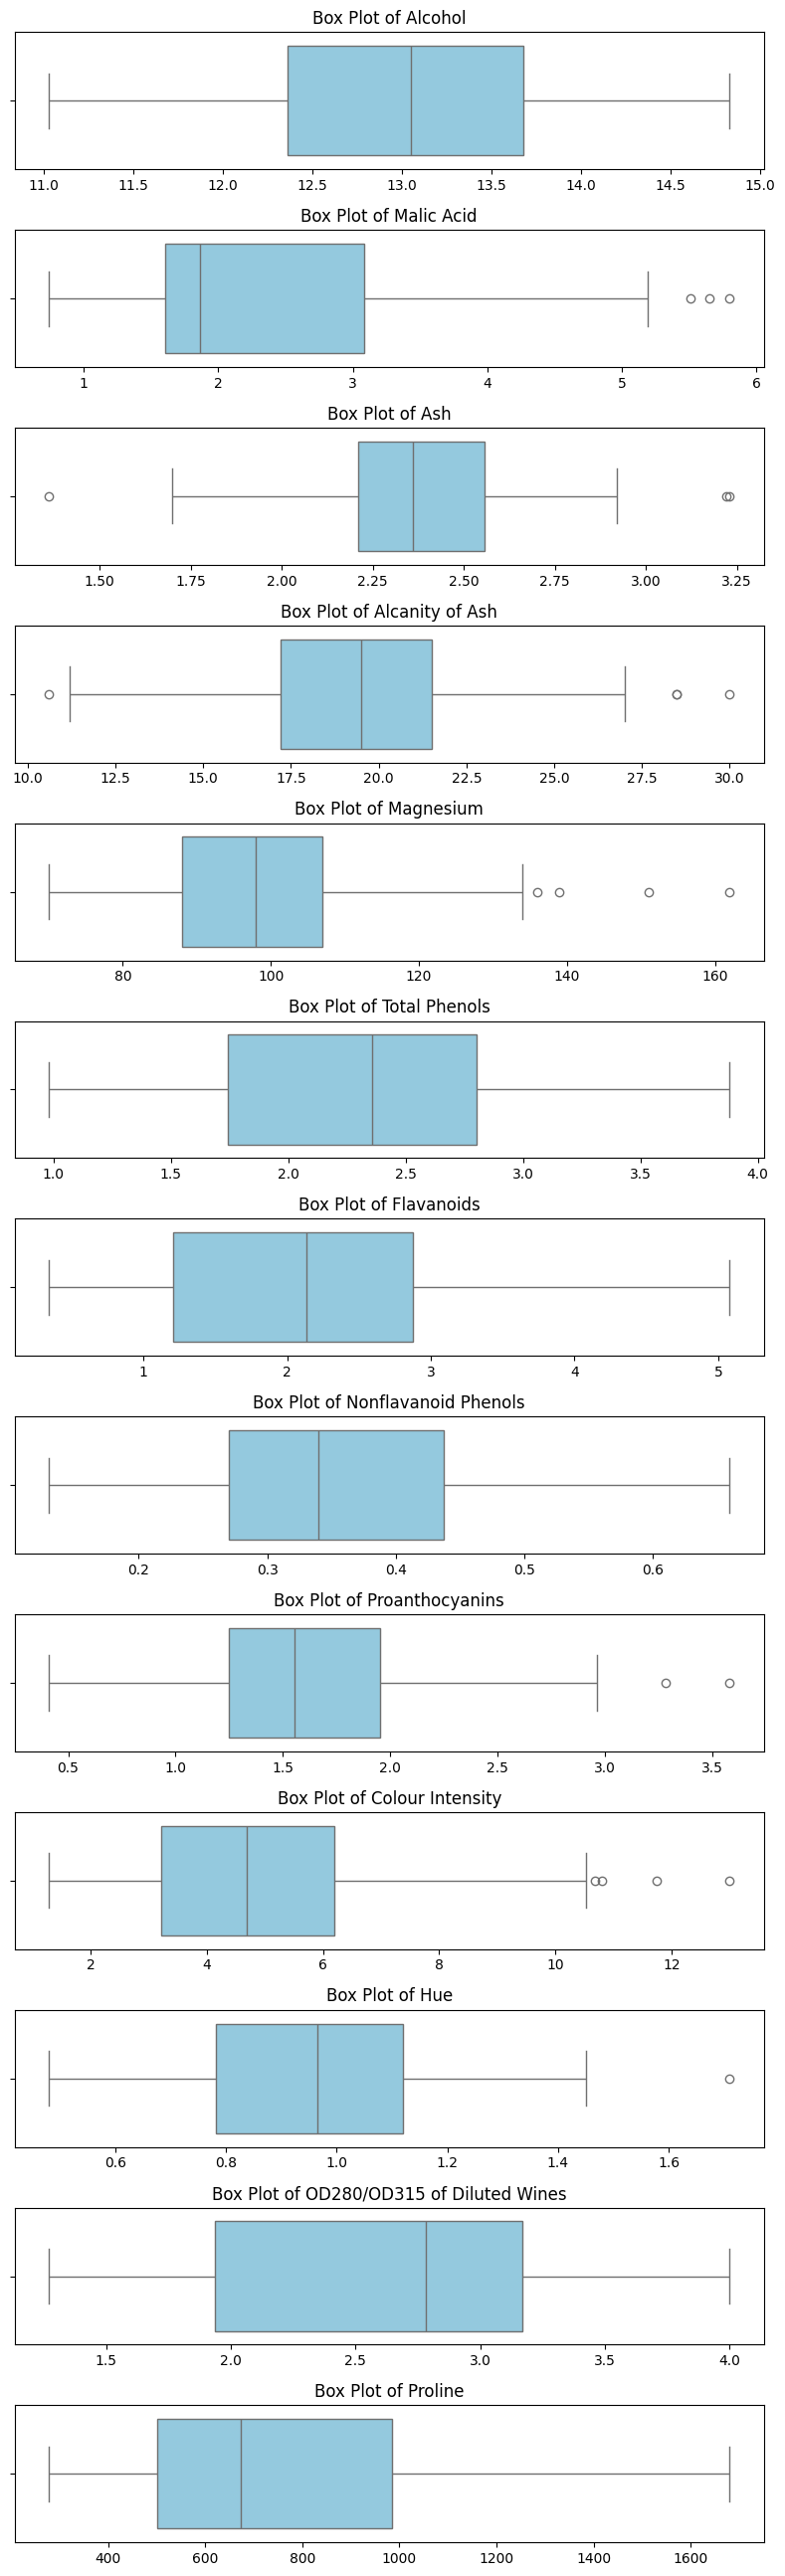

,Target,Alcohol,Malic Acid,Ash,Alcanity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid Phenols,Proanthocyanins,Colour Intensity,Hue,OD280/OD315 of Diluted Wines,Proline
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,False,False,True,False,False,False,False,False,False,False,False,False,False,False
174,False,False,False,False,False,False,False,False,False,False,False,False,False,False
175,False,False,False,False,False,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [104]:
# Select feature columns (excluding 'Target') and limit to the first 13 columns
feature_columns = wine_data.drop(['Target'], axis=1)[:13]

# Get the number of feature columns
num_features = len(feature_columns)

# Create subplots with one boxplot for each feature
fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(8, num_features * 2))

# Loop through each feature and create a box plot for it
for i, feature in enumerate(feature_columns):
    sns.boxplot(x=wine_data[feature], ax=axes[i], color="skyblue")  # Create boxplot
    axes[i].set_title(f'Box Plot of {feature}', fontsize=12)  # Set title for each boxplot
    axes[i].set_xlabel('')  # Remove x-axis label

plt.tight_layout()  # Adjust the layout so plots don't overlap
plt.show()  # Display the plots

# Calculate the first (Q1) and third (Q3) quartiles
Q1 = wine_data.quantile(0.25)
Q3 = wine_data.quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define lower and upper bounds for outlier detection
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR  # Fixing upper bound (should be Q3 + 1.5 * IQR, not Q3 -)

# Identify outliers by checking if values fall outside the bounds
outliers = ((wine_data < lower) | (wine_data > upper))

# Extract data points that are considered outliers
outlier_data = wine_data[outliers]

# Display the outlier flags for each data point
display(outliers)


### Compare Feature Distributions across different Wine classes

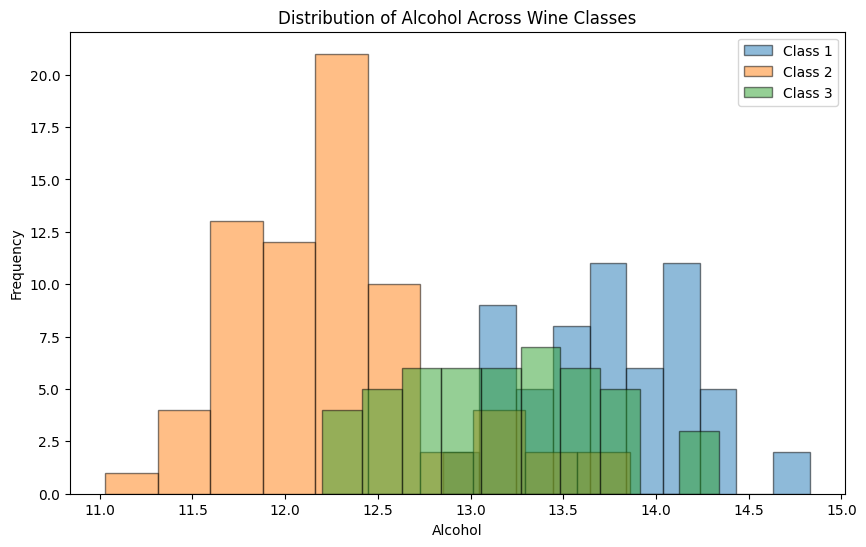

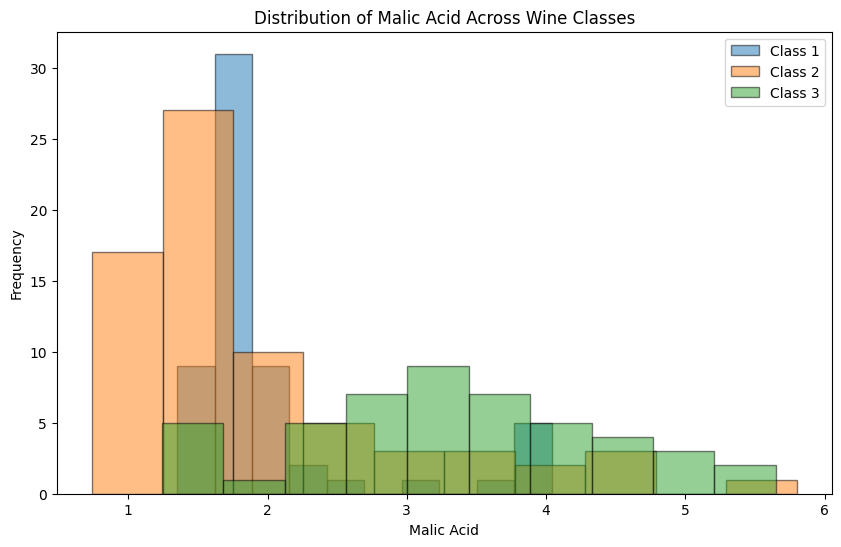

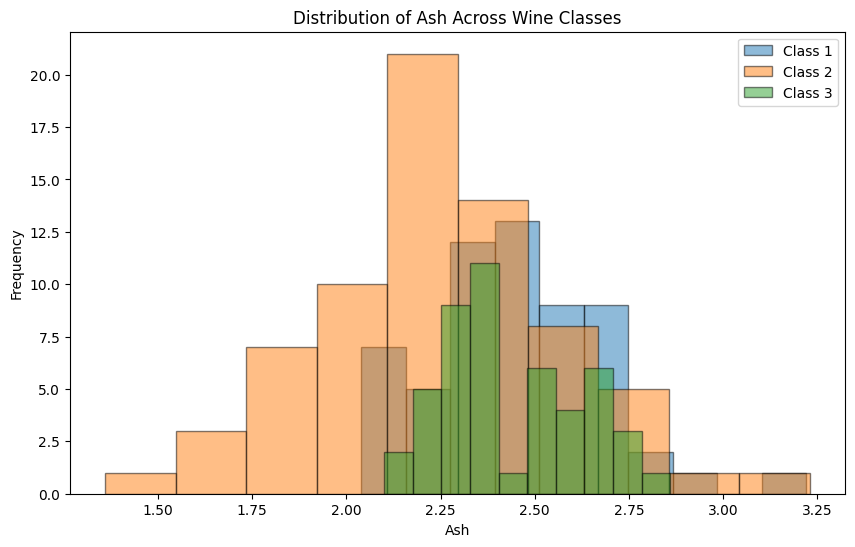

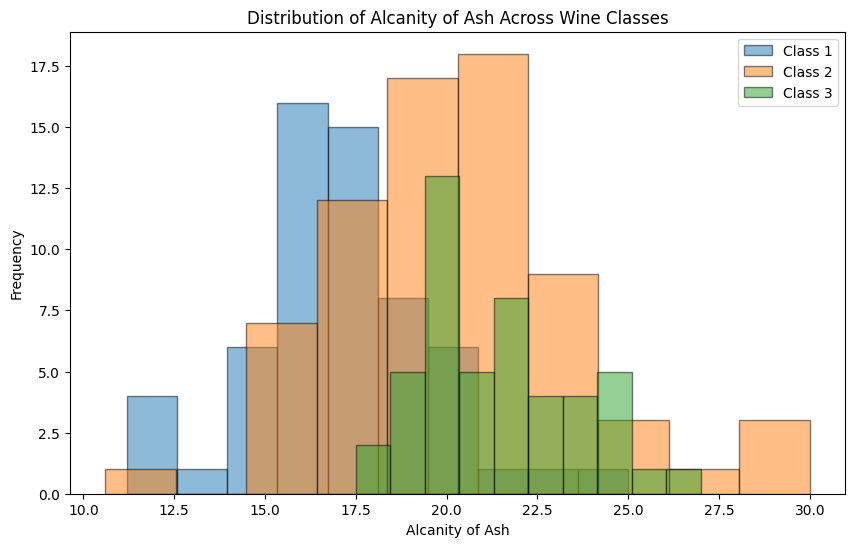

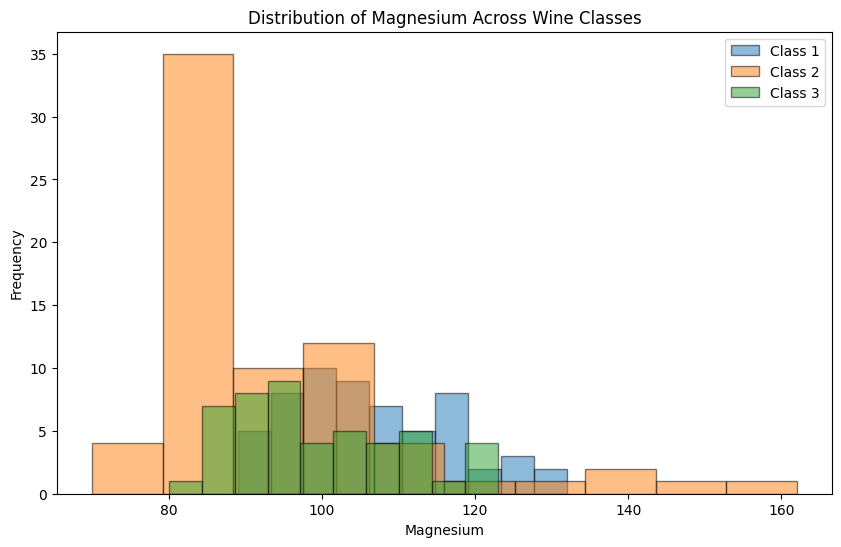

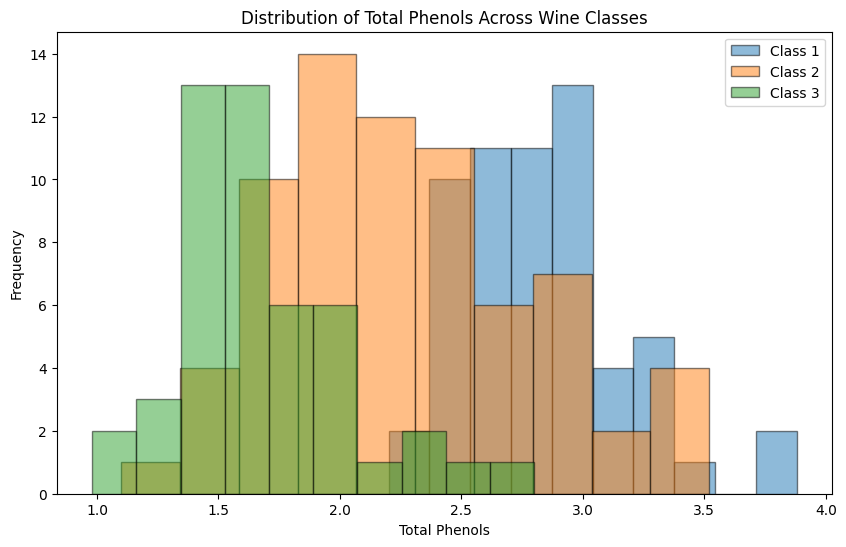

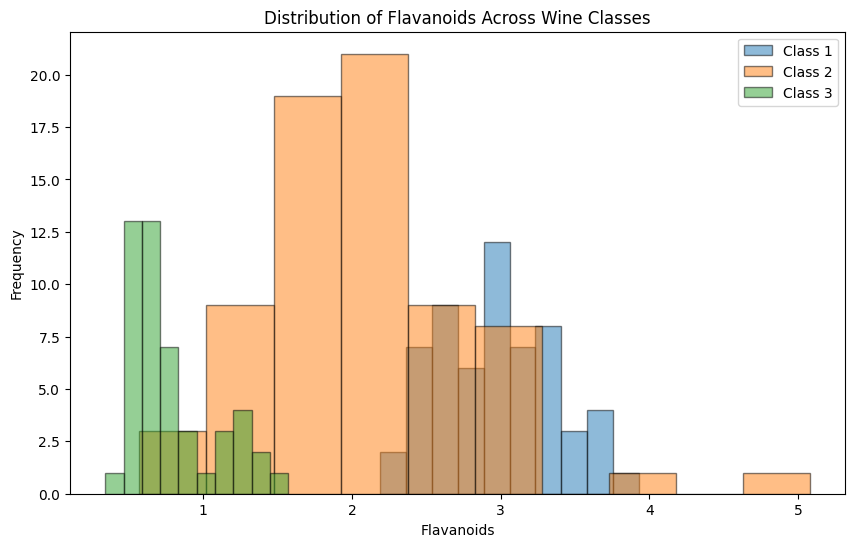

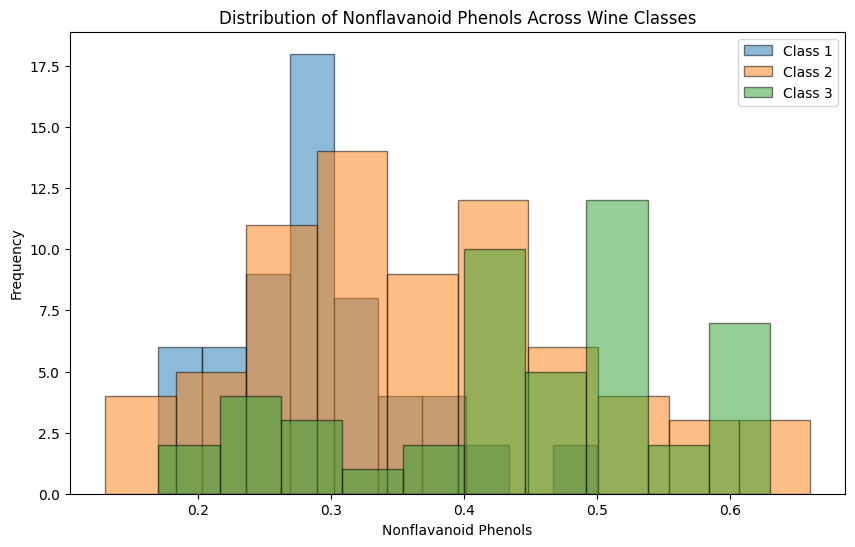

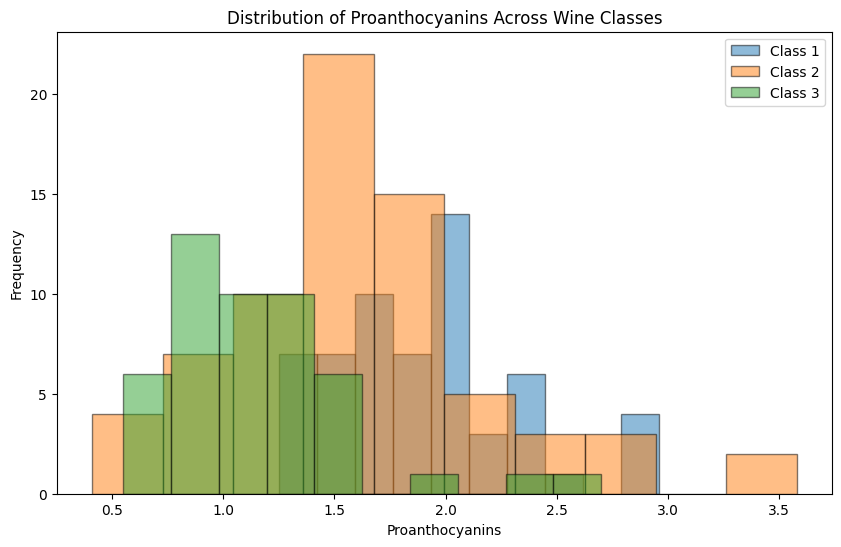

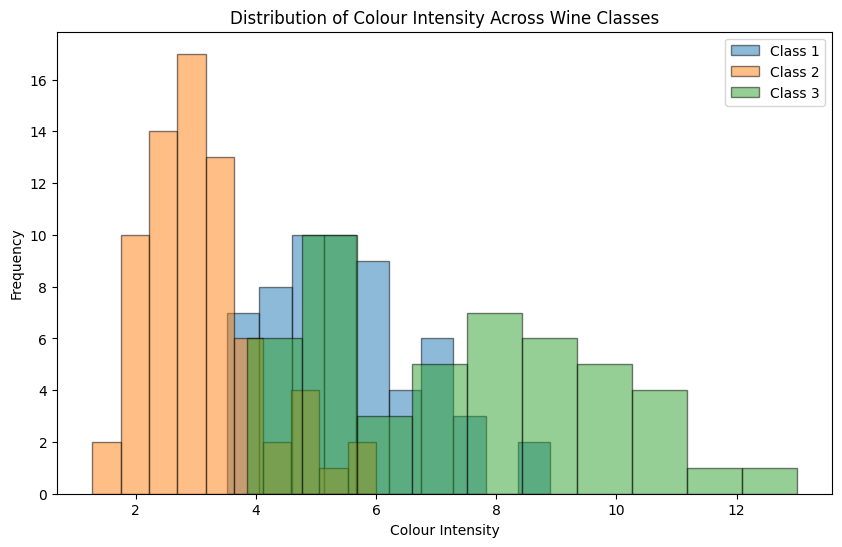

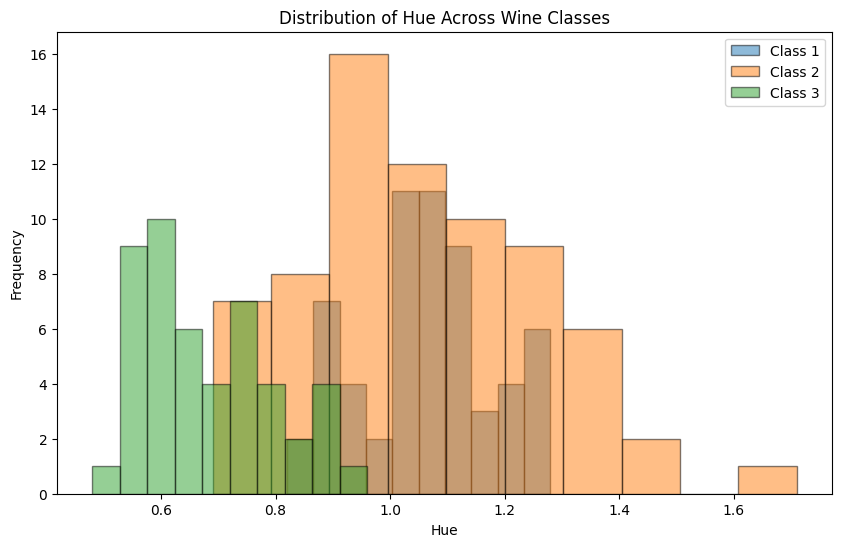

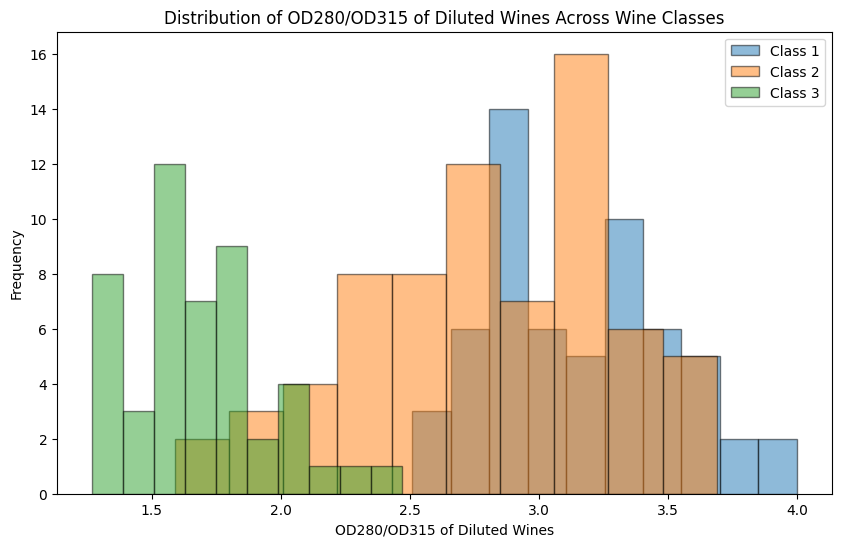

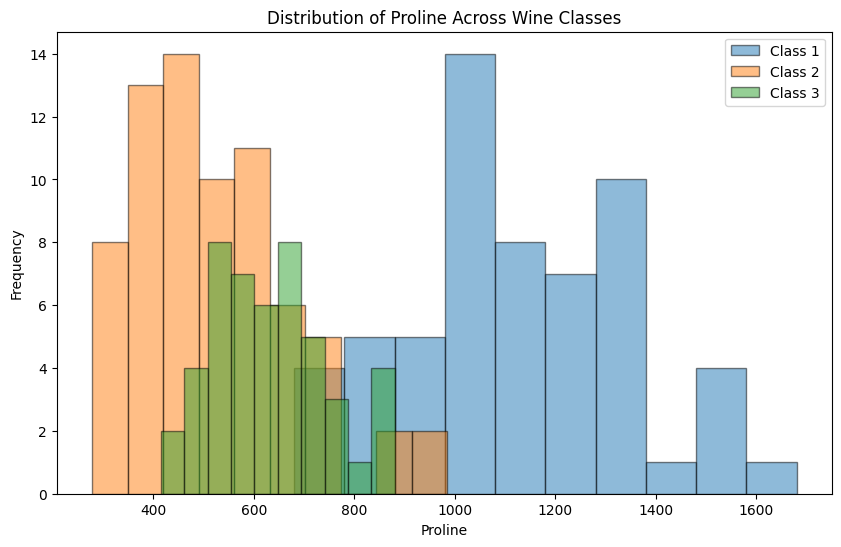

In [105]:
# Loop through each feature column
for feature in feature_columns:
    plt.figure(figsize=(10,6))  # Create a new figure for each feature

    # Loop through each wine class (1, 2, 3) and plot histograms
    for wine_class in [1, 2, 3]:
        # Filter data for the current wine class and feature
        class_data = wine_data[wine_data['Target'] == wine_class][feature]
        # Plot histogram for the current class data with 10 bins
        plt.hist(class_data, bins=10, edgecolor='black', alpha=0.5, label=f'Class {wine_class}')

    # Add labels, title, and legend to the plot
    plt.xlabel(feature)  # X-axis label (feature name)
    plt.ylabel('Frequency')  # Y-axis label (frequency of occurrence)
    plt.title(f'Distribution of {feature} Across Wine Classes')  # Plot title
    plt.legend()  # Show legend to differentiate wine classes
    
    plt.show()  # Display the plot for each feature


### Generate box plots to show feature distributions by class

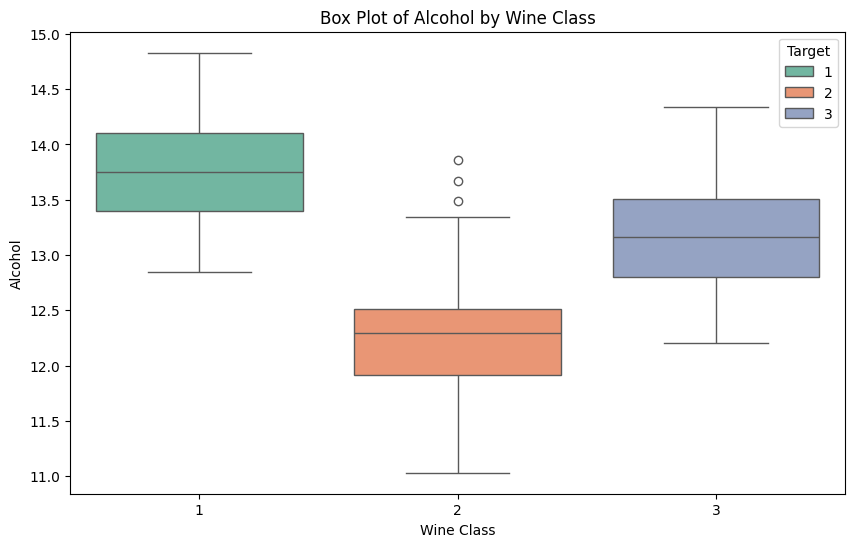

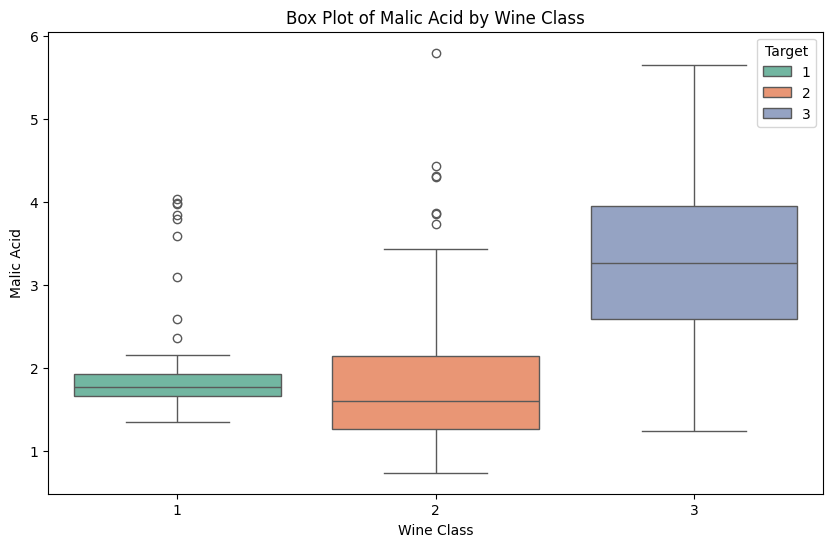

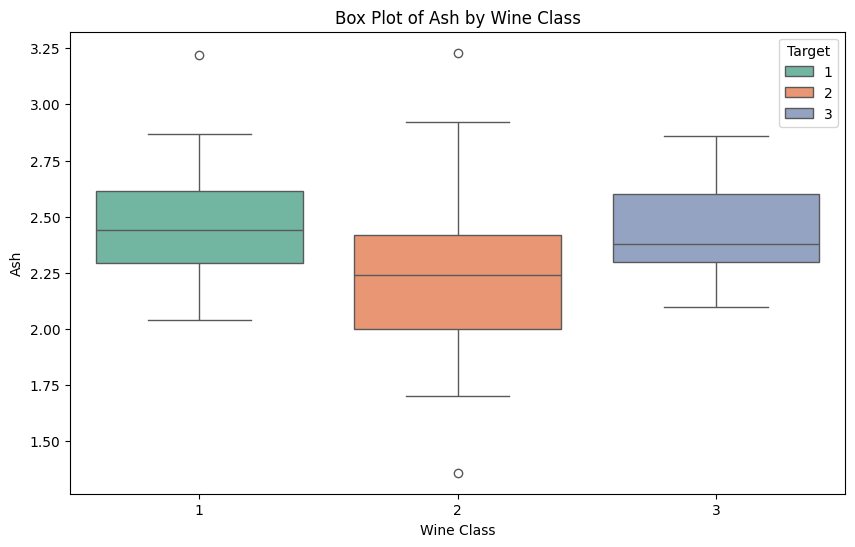

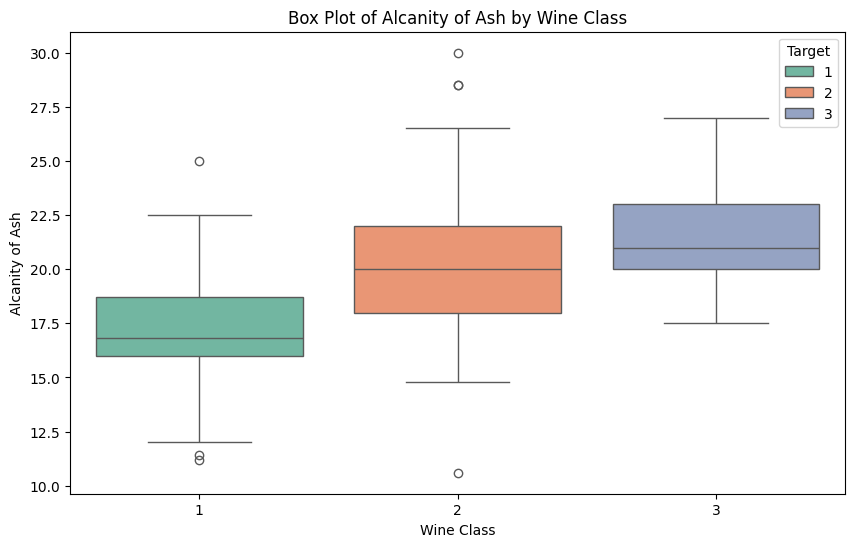

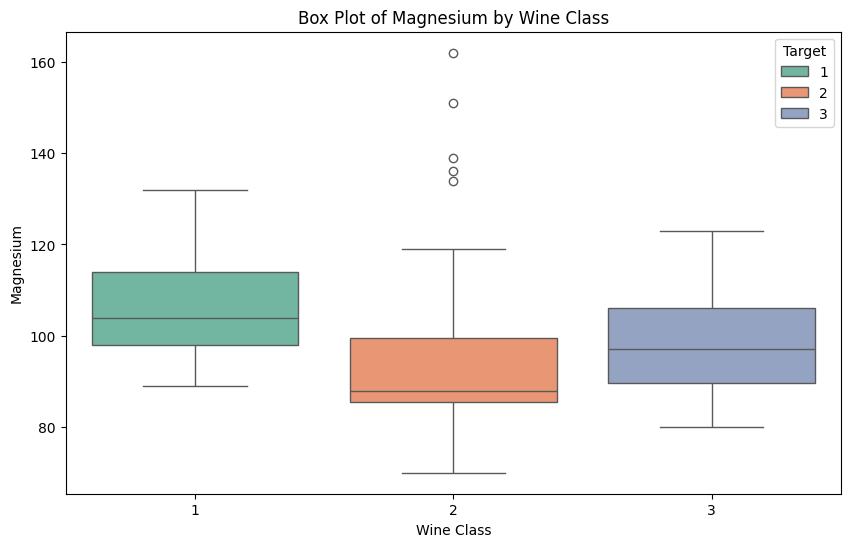

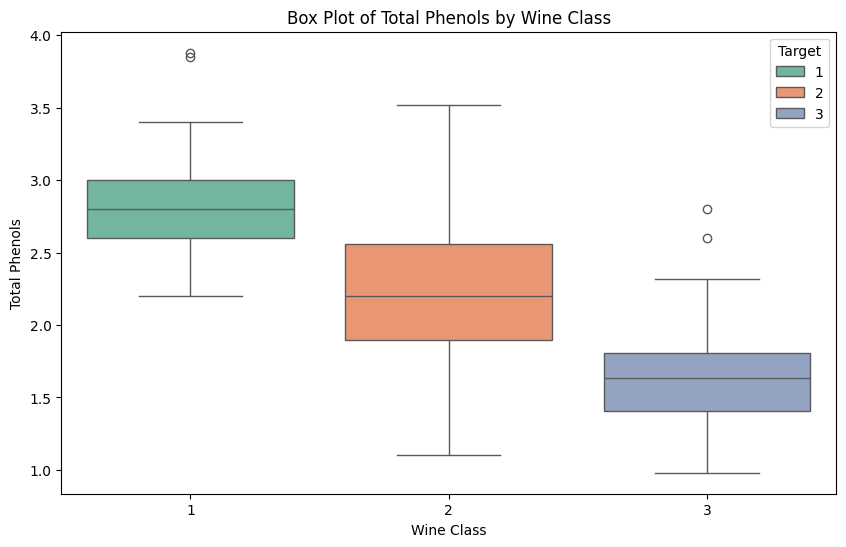

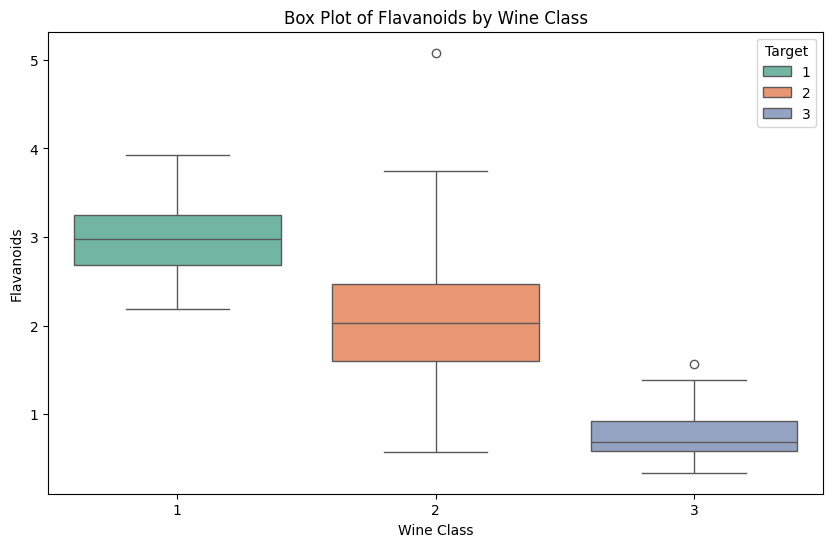

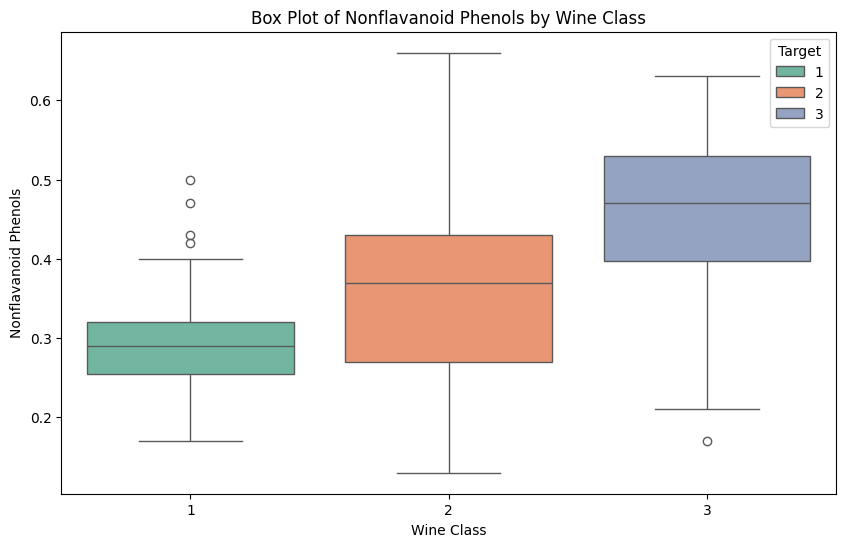

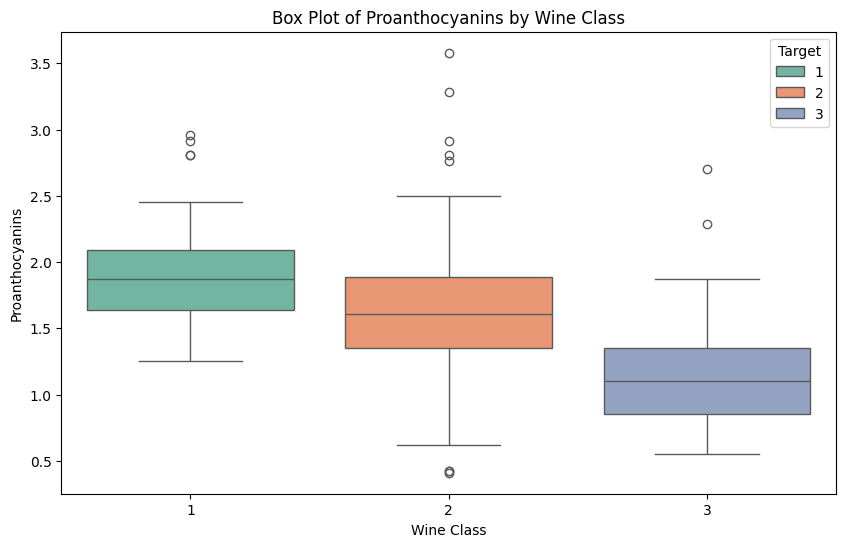

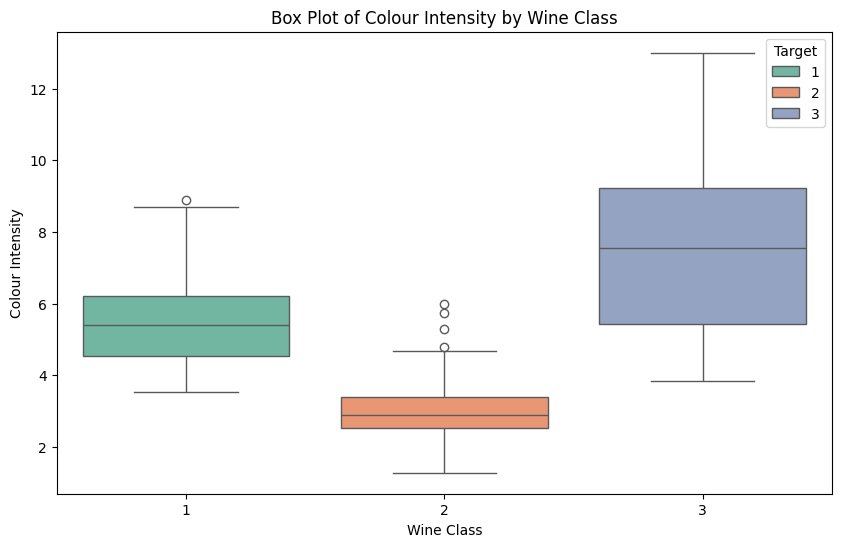

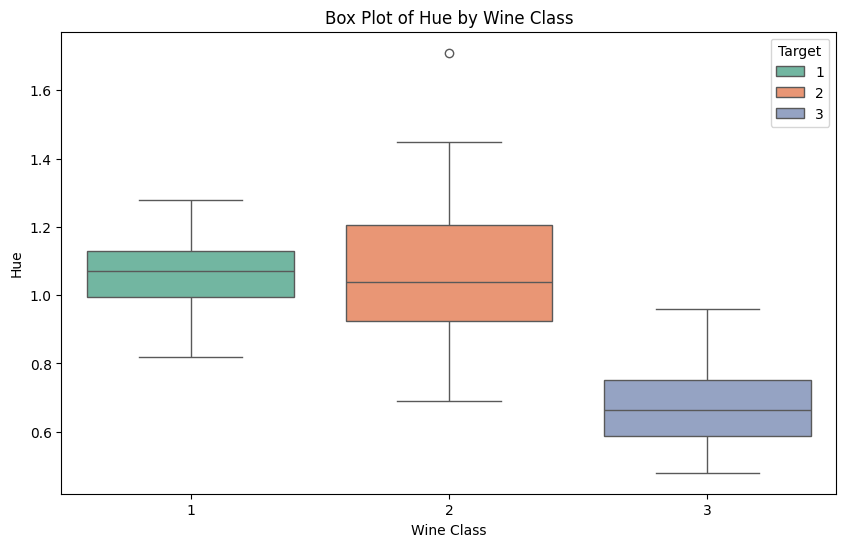

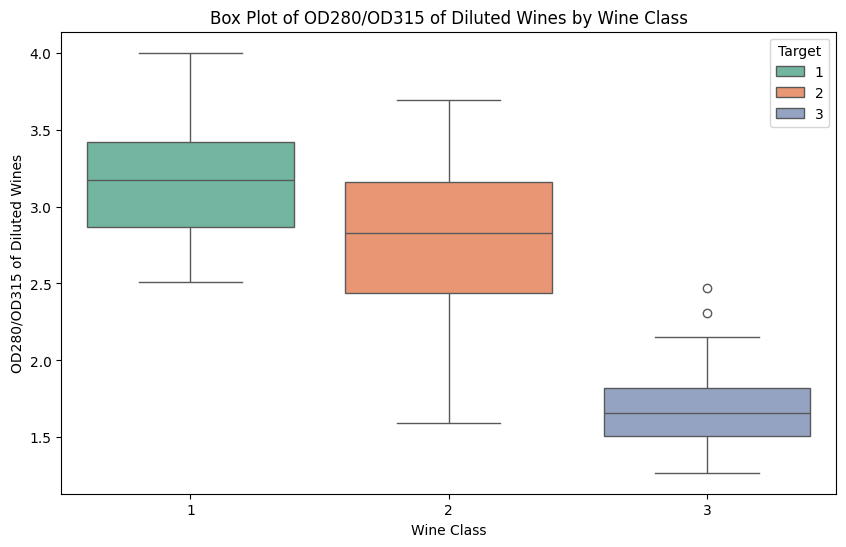

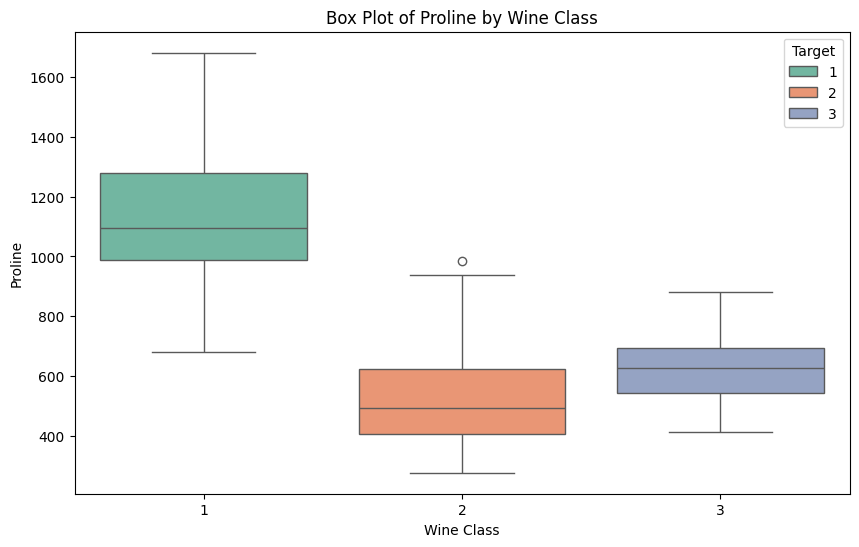

In [106]:
# Loop through each feature column
for feature in feature_columns:
    plt.figure(figsize=(10,6))  # Create a new figure for each feature

    # Create a box plot showing the distribution of the feature across wine classes
    sns.boxplot(x='Target', y=feature, data=wine_data, hue='Target', palette='Set2')

    # Add labels, and title to the plot
    plt.xlabel('Wine Class')  # X-axis label (wine class)
    plt.ylabel(feature)  # Y-axis label (feature name)
    plt.title(f'Box Plot of {feature} by Wine Class')  # Plot title
    
    plt.show()  # Display the plot for each feature


### Develop a Correlation Heat Map
This helps you visually understand how different features in dataset are related to each other. For example, if two features have a **high positive correlation**, this means they tend to increase or decrease together. Opposite to this, a **high negative correlation** indicates that as one feature increases, the other decreases.

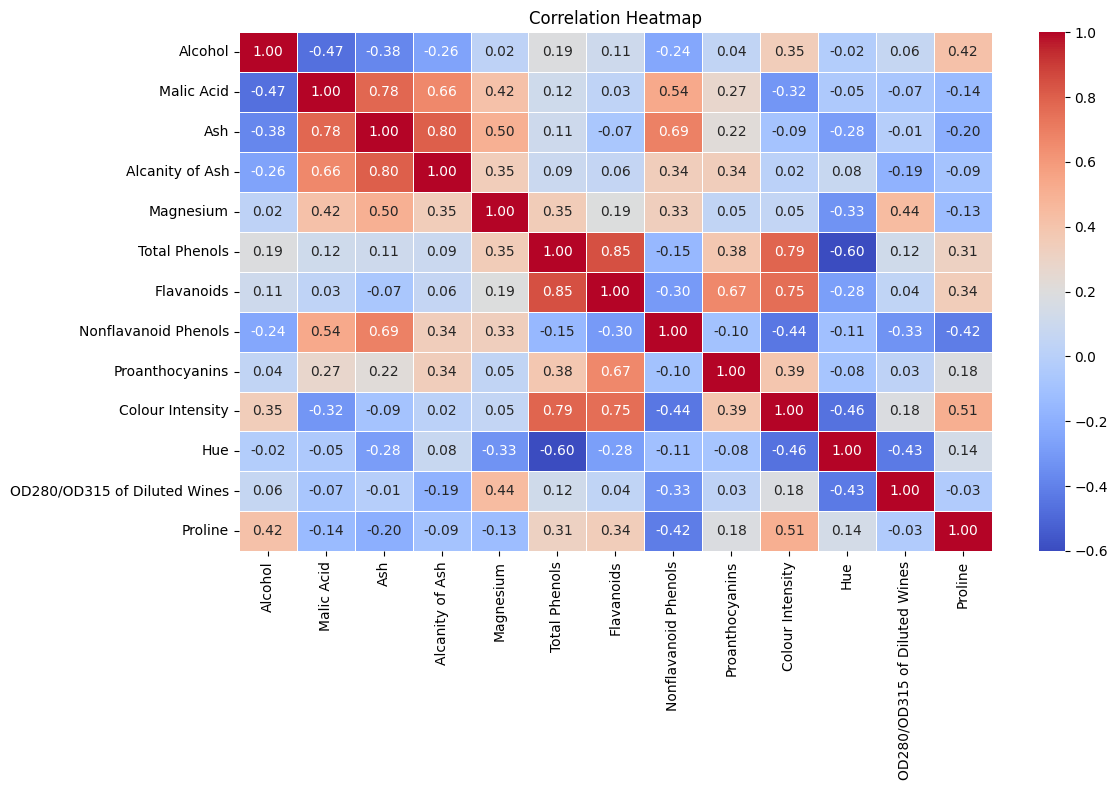

In [107]:
# Calculate the correlation matrix
corr_matrix = feature_columns.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Display the heatmap
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

The colour intensity ranges from red(strong positive correlation, closer to +1) to blue (strong negative correlation, closer to -6).

Every value diagonally is 1.00 as each feature is ideally correlated with itself.

### Key Correlations

1. **Strong Positive Correlations**

   
   * Malic Acid & Ash (0.78) - wines with higher malic acid tend to have more ash content.
   * Ash & Alcalinity of Ash (0.80) - alcalinity of ash strongly depends on the ash content.
   * Flavonoids & Total Phenols (0.85) - higher flavonoids contribute to higher total phenol content.
   * Colour Intensity & Flavonoids (0.75) - wines with higher flavonoids generally have more colour intensity.
   * Proline & Alcohol (0.42) - higher alcohol levels correlate with higher proline content.

   
2. **Strong Negative Correlations**

   
    * Flavonoids & Hue (-0.60) - wines with more flavonoids tend to have lower hue values.
    * Nonflavonoid Phenols & Flavonoids (-0.30) - nonflavonoid phenols tend to be lower when flavonoid levels increase.
    * Colour Intensity & Malic Acid (-0.32) - wines with higher malic acid then to have lower colour intensity

3. **Moderate Correlations**

   
    * Total Phenols & Proanthocyanins (0.67) - higher proanthocyanin levels contribute to total phenol content.
    * Flavonoids & Proanthocyanins (0.67) - flavonoids and proanthocyanins are related compounds.
    * Magnesium & Malic Acid (0.42) - some relation between these two chemical properties
    * Colour Intensity & Proline (0.51) - wines with more colour intensity tend to have higher proline content.
   

### Create pair plots to visualise relationships between features

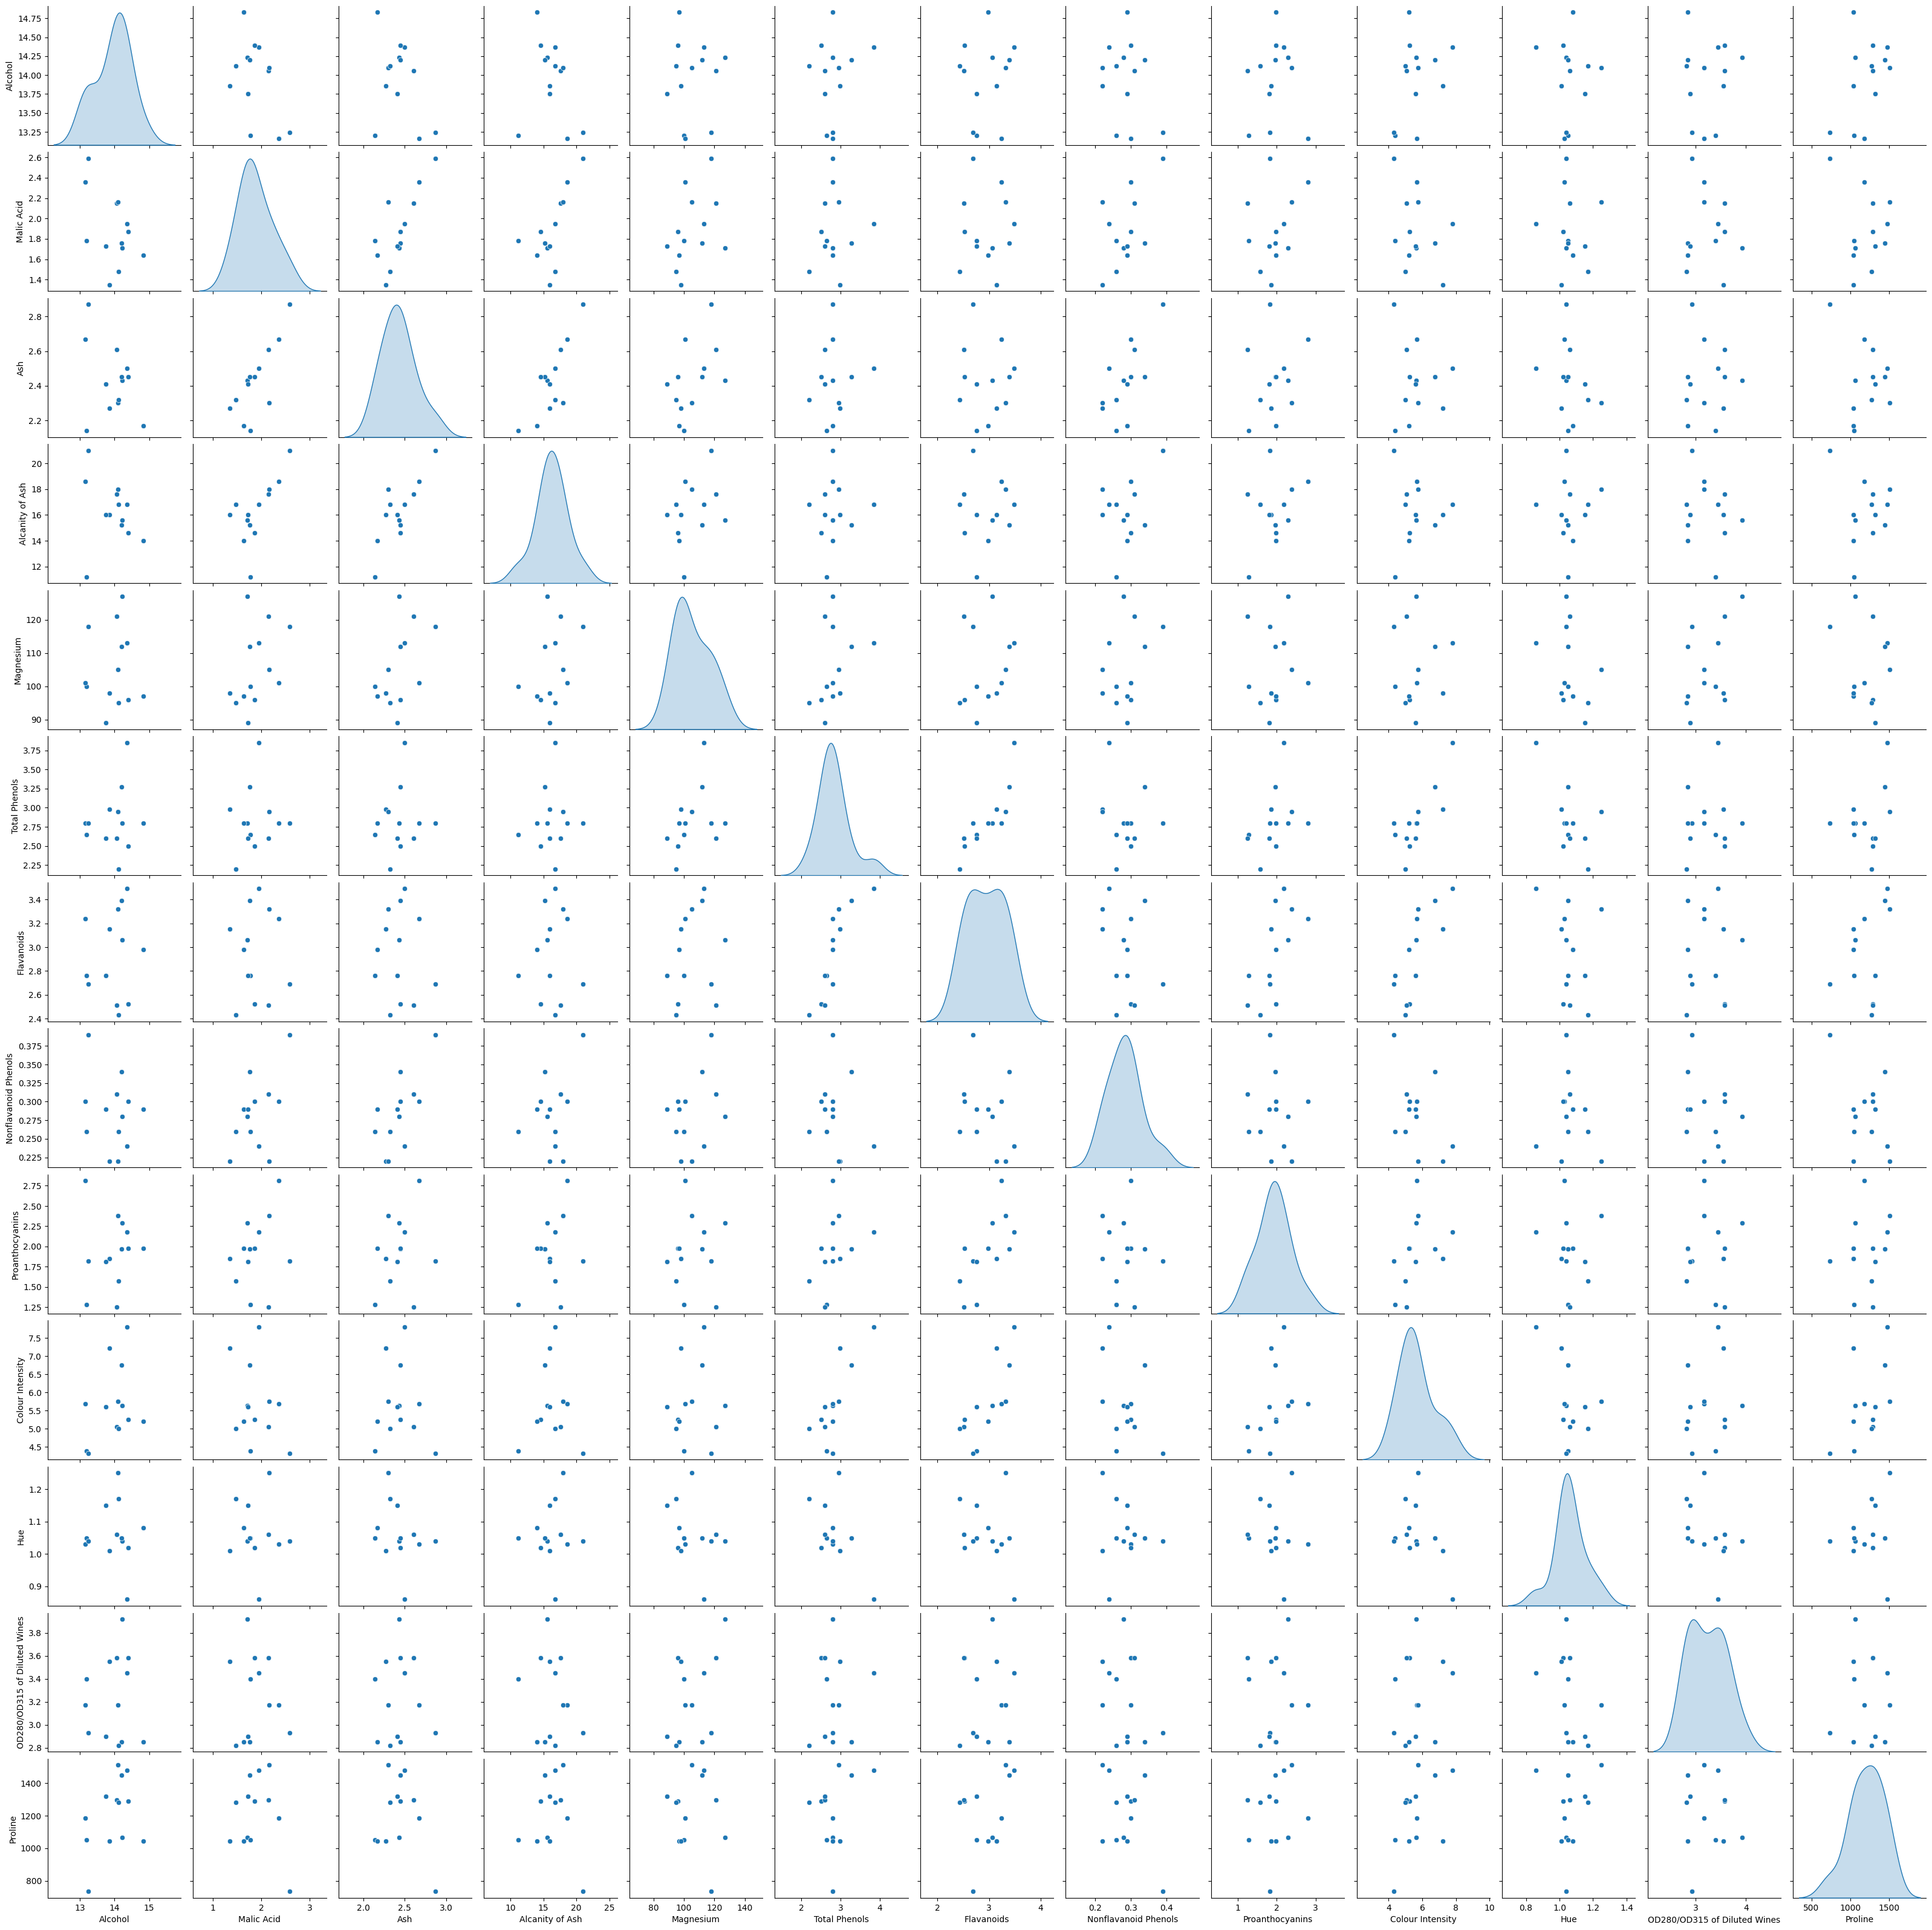

In [109]:
sns.pairplot(feature_columns, diag_kind='kde')
plt.show()

### Feature Importance 
To determine feature importance and visualise it we can use Random Forest Model from sklearn library

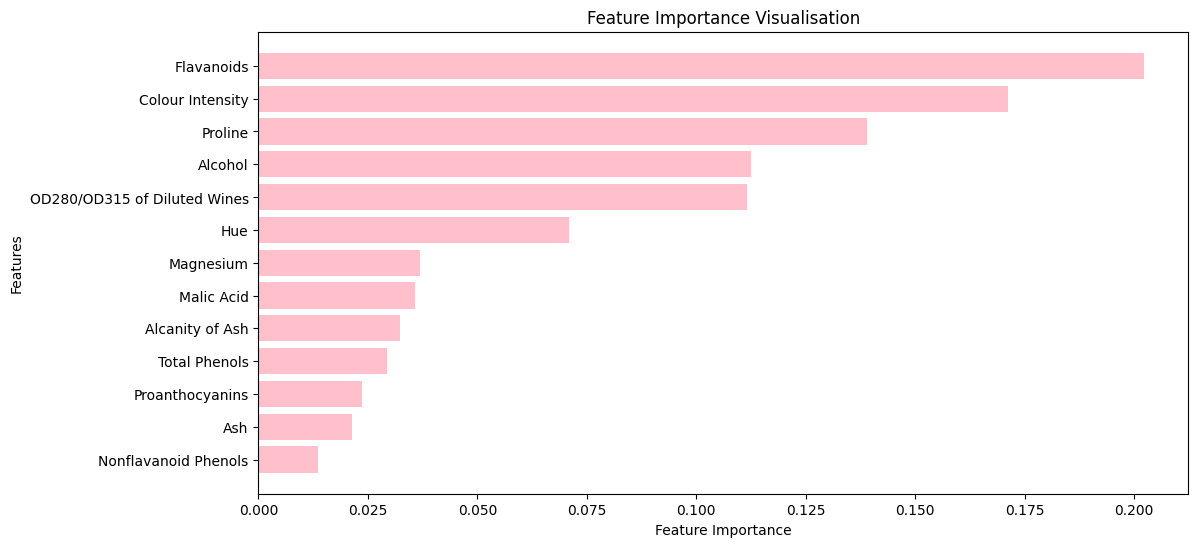

In [110]:
# Separate features (X) and target variable (y)
X = wine_data.drop(columns=['Target'])  # Features
y = wine_data['Target']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=42)

# Initialize and train the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances from the trained model
importances = rf.feature_importances_
feature_names = X.columns

# Sort features by importance in descending order
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]
sorted_features = feature_names[sorted_indices]

# Plot feature importances
plt.figure(figsize=(12,6))
plt.barh(sorted_features, sorted_importances, color='pink')  # Horizontal bar chart
plt.xlabel("Feature Importance")  # X-axis label
plt.ylabel("Features")  # Y-axis label
plt.title("Feature Importance Visualisation")  # Plot title
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()  # Display the plot


From the plot above we can see that the most important feature in this wine dataset is **Flavanoids**, also there are other features that are important like: **Colour intensity**, **Proline**, **Alcohol**, **OD280/OD315**.

### Feature Scaling Comparison
We need to ensure that all numerical features have a similar scale, which will improve the performance of KNN, SVM, **Logistic Regression**, Neural Networks. There are two common scaling techniques:
1. Standardisation (Z-score normalisation):
   * Transforms features to have zero mean and unit variance
   * Used in SVM, KNN, PCA, Logistic Regression
2. Min-Max Scaling (Normalisation):
   * Transforms features to a fixed range (usually 0 to 1)
   * Used in **Deep Learning** and cases where data needs to be bounded.
   
We need to scale the features using these two techniques and then compare the original and scaled distributions using **violin plots**.

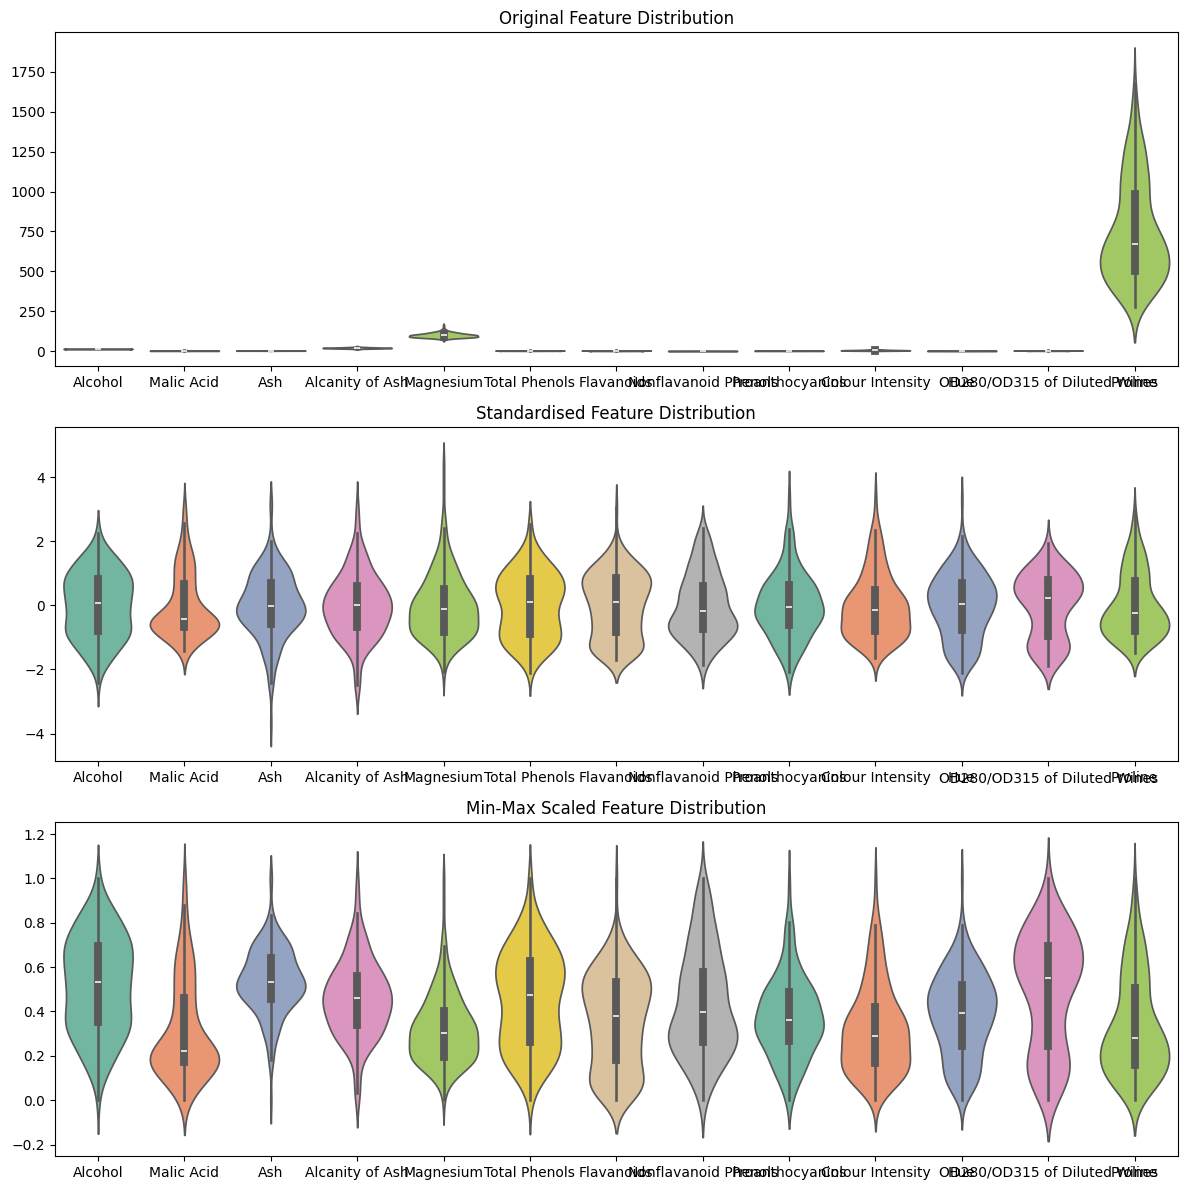

In [111]:
# Z-score scaling: Standardise the features (mean=0, standard deviation=1)
scaler_standard = StandardScaler()
X_standard = pd.DataFrame(scaler_standard.fit_transform(X), columns=X.columns)

# Min-Max scaling: Normalise the features to range between 0 and 1
scaler_minmax = MinMaxScaler()
X_minmax = pd.DataFrame(scaler_minmax.fit_transform(X), columns=X.columns)

# Create subplots to display the distribution of features for different scaling methods
fig, axes = plt.subplots(3, 1, figsize=(12,12))

# Plot violin plot for original feature distribution
sns.violinplot(data=X, ax=axes[0], palette="Set2")
axes[0].set_title("Original Feature Distribution")

# Plot violin plot for standardised feature distribution
sns.violinplot(data=X_standard, ax=axes[1], palette="Set2")
axes[1].set_title("Standardised Feature Distribution")

# Plot violin plot for Min-Max scaled feature distribution
sns.violinplot(data=X_minmax, ax=axes[2], palette="Set2")
axes[2].set_title("Min-Max Scaled Feature Distribution")

# Adjust layout to prevent overlap and display the plots
plt.tight_layout()
plt.show()


Violin plots are the combination of box plots and kernel density plots, making them useful for visualisation both distribution and spread of data. They show data distribution, identify outliers and skewness (we can see if a feature has outliers or if it's skewed before and after scaling), compare distributions effectively since feature scaling changes the shape of the distribution, **violin plots** help in visually confirming if the transformation is appropriate.

# 3. Model Selection and Training

I am going to use the following models:

1. **Logistic Regression**
   A simple and widely used linear model for classification. It predicts the probability of a class using the sigmoid function and is effective for binary and multiclass classification problems.

2. **Support Vector Machine (SVM)**
   A powerful algorithm that finds the optimal decision boundary by maximising the margin between different classes. It works well with both linear and non-linear data using kernel tricks.

3. **Decision Tree**
   A tree-based model that splits data into branches based on feature values. It is easy to interpret but can overfit if not properly pruned.

4. **Random Forest**
   An ensemble learning method that builds multiple decision trees and averages their predictions. It is more robust and reduces overfitting compared to a single decision tree.

5. **K-Nearest Neighbors (KNN)**
   A non-parametric model that classifies a sample based on the majority class of its k-nearest neighbors. It is simple but can be **slow** for large datasets.

## Logistic Regression

In [112]:
# Initialize a logistic regression model with balanced class weights and a max iteration limit of 500
log_reg_all = LogisticRegression(max_iter=500, class_weight='balanced', random_state=42)

# Standardise the training and test data using the previously fitted StandardScaler
X_train_scaled = scaler_standard.fit_transform(X_train)
X_test_scaled = scaler_standard.fit_transform(X_test)

# Convert the scaled data back to DataFrame to retain the original feature names and indices
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Print the size of the training and test sets
print("Training set size:", len(y_train))
print("Test set size:", len(y_test))


Training set size: 142
Test set size: 36


Train the Model - All Features

In [113]:
# Train the logistic regression model on the scaled training data
log_reg_all.fit(X_train_scaled, y_train)

# Use the trained model to predict the target variable on the scaled test data
y_pred_all = log_reg_all.predict(X_test_scaled)


Train the model - Important Features

In [114]:
# Selecting important features
important_features = ['Flavanoids', 'Colour Intensity', 'Proline', 'Alcohol', 'OD280/OD315 of Diluted Wines']
X_train_imp = X_train[important_features]
X_test_imp = X_test[important_features]

# Apply scaling
X_train_imp_scaled = scaler_standard.fit_transform(X_train_imp)
X_test_imp_scaled = scaler_standard.transform(X_test_imp)

# Train Logistic Regression
log_reg_imp = LogisticRegression(max_iter=500, random_state=42)
log_reg_imp.fit(X_train_imp_scaled, y_train)

# Predictions
y_pred_imp = log_reg_imp.predict(X_test_imp_scaled)



## Support Vector Machine

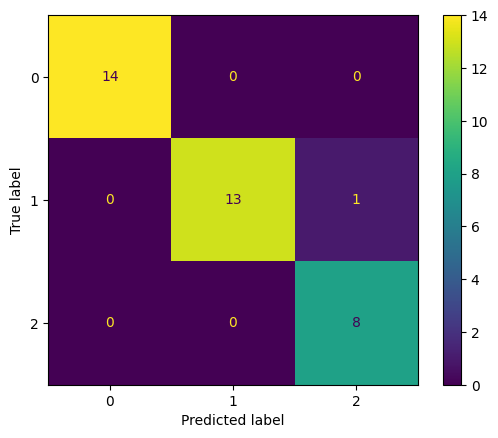

[[14  0  0]
 [ 0 13  1]
 [ 0  0  8]]


In [115]:
# Initialize a Support Vector Machine (SVM) classifier with a linear kernel
svm = SVC(kernel='linear')

# Train the SVM model on the scaled training data
svm.fit(X_train_scaled, y_train)

# Predict the target variable on the scaled test data
y_predSVM = svm.predict(X_test_scaled)

# Generate the confusion matrix to compare actual vs predicted values
cm = confusion_matrix(y_test, y_predSVM)

# Display the confusion matrix using a visual representation
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Show the confusion matrix plot
plt.show()

# Print the numerical confusion matrix
print(cm)


Trying different kernel to improve accuracy

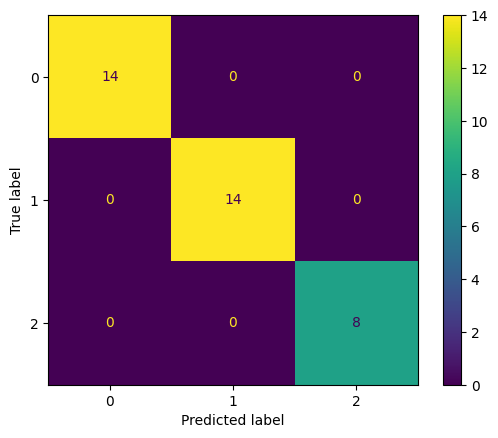

[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


In [116]:
# Initialize a Support Vector Machine (SVM) classifier with a radial basis function (RBF) kernel
svm = SVC(kernel='rbf', C=1, gamma='scale')

# Train the SVM model on the scaled training data
svm.fit(X_train_scaled, y_train)

# Predict the target variable on the scaled test data
y_predSVM = svm.predict(X_test_scaled)

# Generate the confusion matrix to compare actual vs predicted values
cm = confusion_matrix(y_test, y_predSVM)

# Display the confusion matrix using a visual representation
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Show the confusion matrix plot
plt.show()

# Print the numerical confusion matrix
print(cm)


## Decision Tree

In [117]:
# Initialize a Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train the Decision Tree model on the scaled training data
model = clf.fit(X_train_scaled, y_train)


Text Representation

In [118]:
# Export the decision tree model as text for easy visualization of its structure
text_representation = tree.export_text(clf)

# Print the text representation of the trained decision tree
print(text_representation)


|--- feature_9 <= -0.53
|   |--- feature_12 <= 0.89
|   |   |--- feature_2 <= 2.55
|   |   |   |--- class: 2
|   |   |--- feature_2 >  2.55
|   |   |   |--- class: 1
|   |--- feature_12 >  0.89
|   |   |--- class: 1
|--- feature_9 >  -0.53
|   |--- feature_6 <= -0.60
|   |   |--- class: 3
|   |--- feature_6 >  -0.60
|   |   |--- feature_12 <= -0.03
|   |   |   |--- feature_1 <= 1.36
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  1.36
|   |   |   |   |--- class: 1
|   |   |--- feature_12 >  -0.03
|   |   |   |--- class: 1



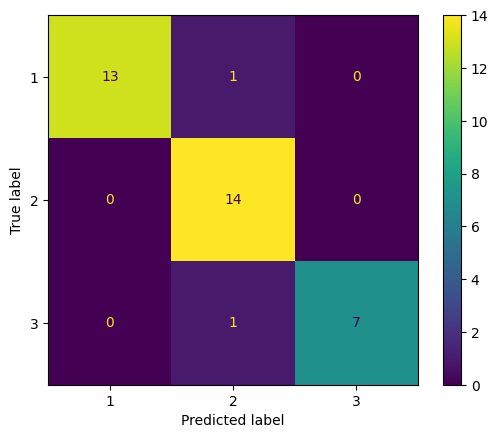

In [119]:
# Make predictions on the scaled test data using the trained decision tree model
prediction = clf.predict(X_test_scaled)

# Generate the confusion matrix to compare actual vs predicted values
cmclf = confusion_matrix(y_test, prediction, labels=clf.classes_)

# Display the confusion matrix using a visual representation
disp = ConfusionMatrixDisplay(confusion_matrix=cmclf, display_labels=clf.classes_)
disp.plot()

# Show the confusion matrix plot
plt.show()


## KNN (K-Nearest Neighbors)

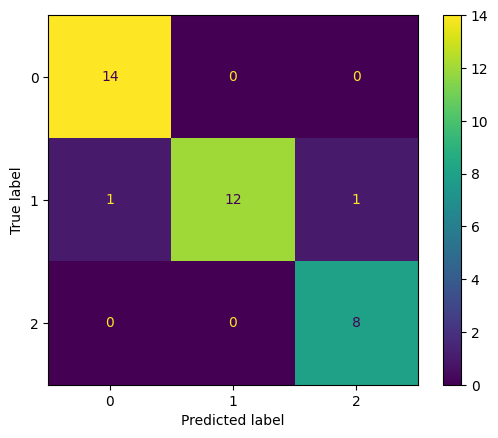

[[14  0  0]
 [ 1 12  1]
 [ 0  0  8]]


In [120]:
# Initialize a K-Nearest Neighbours (KNN) classifier with 5 neighbours
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model on the scaled training data
knn.fit(X_train_scaled, y_train)

# Predict the target variable on the scaled test data
y_predKNN = knn.predict(X_test_scaled)

# Generate the confusion matrix to compare actual vs predicted values
cm_knn = confusion_matrix(y_test, y_predKNN)

# Display the confusion matrix using a visual representation
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp.plot()

# Show the confusion matrix plot
plt.show()

# Print the numerical confusion matrix
print(cm_knn)


### Finding the Optimal K-value
Larger values (10, 20) smooth the decision boundary and might generalise better. Typically test values up to 20 or higher to observe accuracy trends.

In [121]:
# Iterate over a range of k values from 1 to 20
for k in range(1, 21):
    # Initialize a K-Nearest Neighbours classifier with the current k value
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Perform 5-fold cross-validation and get the accuracy scores
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
    
    # Print the mean accuracy for the current k value
    print(f'k={k}, Mean Accuracy={scores.mean():.4f}')


k=1, Mean Accuracy=0.9505
k=2, Mean Accuracy=0.9369
k=3, Mean Accuracy=0.9576
k=4, Mean Accuracy=0.9505
k=5, Mean Accuracy=0.9510
k=6, Mean Accuracy=0.9510
k=7, Mean Accuracy=0.9507
k=8, Mean Accuracy=0.9438
k=9, Mean Accuracy=0.9369
k=10, Mean Accuracy=0.9441
k=11, Mean Accuracy=0.9438
k=12, Mean Accuracy=0.9579
k=13, Mean Accuracy=0.9648
k=14, Mean Accuracy=0.9576
k=15, Mean Accuracy=0.9507
k=16, Mean Accuracy=0.9507
k=17, Mean Accuracy=0.9507
k=18, Mean Accuracy=0.9579
k=19, Mean Accuracy=0.9579
k=20, Mean Accuracy=0.9579


### Evaluation of models

In [122]:
# Define the models to evaluate with their respective configurations
models = {
    "SVM": SVC(kernel='rbf', C=1, gamma='scale'),
    "KNN": KNeighborsClassifier(n_neighbors=13),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression (Imp Features)": LogisticRegression(max_iter=500, random_state=42),
    "Logistic Regression (All Features)": LogisticRegression(max_iter=500, class_weight='balanced', random_state=42)
}

# Dictionary to store cross-validation results
cv_results = {}

# Perform 5-fold cross-validation for each model and store the mean accuracy
for name, model in models.items():
    scores_all = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_results[name] = np.mean(scores_all)

# Print the mean accuracy for each model
for name, accuracy in cv_results.items():
    print(f'{name}: {accuracy:.4f}')


SVM: 0.9719
KNN: 0.9648
Decision Tree: 0.9224
Logistic Regression (Imp Features): 0.9791
Logistic Regression (All Features): 0.9791


F1 - Score

In [123]:
# Define the models to evaluate
models = {
    "SVM": SVC(kernel='rbf', C=1, gamma='scale'),
    "KNN": KNeighborsClassifier(n_neighbors=13),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression (Imp Features)": LogisticRegression(max_iter=500, random_state=42),
    "Logistic Regression (All Features)": LogisticRegression(max_iter=500, class_weight='balanced', random_state=42)
}

# Dictionary to store cross-validation results
cv_results = {}

# Create a weighted F1-score scorer
f1_scorer = make_scorer(f1_score, average='weighted')

# Perform cross-validation for each model and calculate mean weighted F1-score
for name, model in models.items():
    scores_all = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring=f1_scorer)
    cv_results[name] = np.mean(scores_all)  # Store the mean F1-score

# Print the mean F1-score for each model
for name, f1 in cv_results.items():
    print(f'{name}: {f1:.4f}')


SVM: 0.9717
KNN: 0.9649
Decision Tree: 0.9218
Logistic Regression (Imp Features): 0.9791
Logistic Regression (All Features): 0.9791


Only decimal point differs by 1

# 4. Discussion of Results

Interpretation of Model Performance Metrics

the classification models were evaluated based on their accuracy with, the following results:

| **Model**                   |**Accuracy**|
|-----------------------------|----------------|
| Logistic Regression (Important Features)         |97.91%|
| Logistic Regression (All Features)                     |97.91%|
| SVM                        |97.17%|
| KNN                        |96.49%|
| Decision Tree.             | 92.18%|



* Logistic Regression (both) performed the best, achieving the highest accuracy of 97.91%, indicating that the model effectively captures the relationships between input features and wine classification.

* SVM performed with 97.17%, slightly lower than regression, this shows strong generalisation.

* KNN performed with 96.49%, but as a distance-based model, it may be more sensitive to noise and feature scaling

* Decision Tree has the lowest accuracy of 92.18%, likely due to lack of generalisation ability.

Based on these observations, Logistic Regreesion seems to be the most effective model for this classification task.

Feature Importance in Classification 

Based on the figure that I done above of identifying what features play the biggest role in the classification (Line [22]). 
Colour intensity, Proline, Alcohol, OD280/OD315.
These features are:
* Colour intensity 
* Proline
* Alcohol
* OD280/OD315



From our SVM model (Line 27) we got the following matrix

[[14  0  0]
 [ 0 13  1]
 [ 0  0  8]]

 * Class 1 was perfectly classified with no misclassifications.
 * Class 2 had one misclassified instance, which was mistaken for Class 3
 * Class 3 had one misclassified instance

Possible reasons why this happend: 
* Overlapping feature values: some wines can share similar chemical properties, which can lead to classification errors.
* Feature scaling impact: differences in feature distributions might influence model predictions.

Comparison of Model Performances (Strengths & Weaknesses)

| **Model**                   |**Strengths**| **Weaknesses**|
|-----------------------------|----------------|------------|
| Logistic Regression   |High accuracy, interpretable, efficient for linearly separable data| May struggle with complex decision boundaries |
| SVM                   |Strong generalidation, effective in high-dimensional spaces| Computationally expensive, sensitive to hyperparameters
| KNN                   |Simple, no training required| Sensitive to noise and feature scaling |
| Decision Tree.        | Fast, interpretable| Prone to overfitting, poor generalisation | 

Logistic Regression is the best choice due to its high accuracy and interpretability. SVM is a close second, effective but potentially more computationally demanding. KNN performs well but is affected by dataset structure and scaling. Decision Tree has the lowest performance due to overfitting.

Visualising Model Predictions

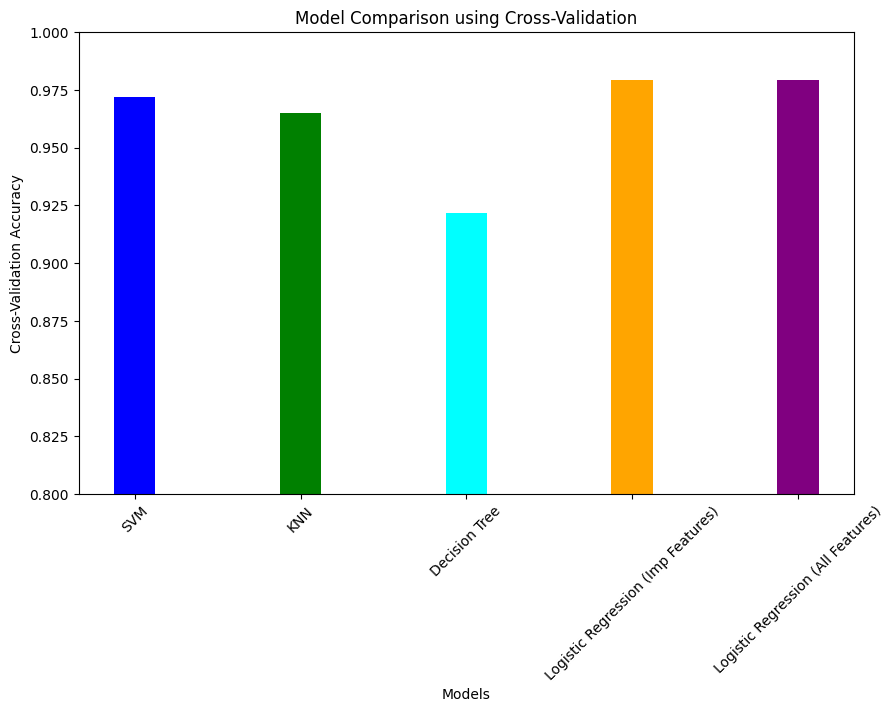

In [124]:
# Create a bar plot to compare the models based on their cross-validation F1-scores
plt.figure(figsize=(10,6))

# Plot the bar chart with the model names on the x-axis and their corresponding F1-scores on the y-axis
plt.bar(cv_results.keys(), cv_results.values(), width=0.25, color=['blue', 'green', 'cyan', 'orange', 'purple'])

# Set the labels for the x and y axes
plt.xlabel("Models")
plt.ylabel("Cross-Validation Accuracy")

# Set the title of the plot
plt.title("Model Comparison using Cross-Validation")

# Set the y-axis limits for better visualisation
plt.ylim(0.8, 1.0)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


# 5. Conclusion

### Summary of Key Findings

The classification models demonstrated high accuracy in predicting wine types based on chemical properties. The best-performing models were:

* Logistic Regression (both versions): Achieved the highest accuracy of 97.91%, making it the most effective model for this classification task.

* SVM: Performed with 97.17% accuracy, which shows that it has strong generalisation capabilities.

* KNN: Performed with 96.49% accuracy, demontrating the effectiveness of a distance-based approach.

* Decision Tree: Performed with the lowest accuracy 92.18


During analysis of what features has the highest impact on the progress of distinguishing wine types I found that the following features had the highest impact on the models:

* Colour intensity 
* Proline
* Alcohol
* OD280/OD315

The misclassification analysis indicated minimal errors, primarily between classes with overlapping feature distributions (some classes could have similar properties).

### Success of the Task

The classification models successfully achieved high accuracy, particularly with Logistic Regression and SVM, confirming that wine type can be effectively predicted based on wine's properties. The minimal misclassifications indicate that the models have learned the distinguishing patterns well. Overall, the task was **highly successful**, with results exceeding 96% accuracy across most models.

### Limitations of My Approach

When models have high performance in terms of accuracy there can be still some limitations or improvements, for limitations:

* Limited dataset size - current dataset is not representing all possible variations in wine characteristics. Different countries or farms have different combinations, some extra features etc..
* Features Overlap - some wines have similar chemical compositions, leading to occasional misclassifications.
* Imbalanced Classes - if one class has significantly fewer samples, the model might not generalise well to unseen data.


### Possible Improvements

* Change of Hyperparameters - while using SVM, KNN or Decision Tree I could play with hyperparameters in order to improve current results.
* Deep Learning Approaches - applying neural networks might uncover more complex patterns in the data.
* Create additional features - for example we could add a feature of rations of chemical components in a wine, this could improve separability.

### Personal Commets

While working on this project, I discovered that wine is a complex product, which is not created solely from alcohol and different kinds of grapes. It has much deeper dimensions, combining various chemical components, brewing methods, aging time, and color intensity. I was surprised to learn that wine can have at least 14 different features or even more, which was something completely new to me.

### Possible Implications
This project shows how effectively machine learning models can classify wines based on their chemical compositions, which could be beneficial for:

* **Wine Producers**: Optimising quality control processes.
* **Retailers**: Assisting in wine recommendations based on chemical profiling, they could apply this knowledge in the market research, identify what wine people like the most and based on this data create promotions for the wines that will be sold the most.
* Based on wine features people can experiment with wines, making it sweeter or drier.

# 6. References

### Datasets and Feature Analysis

[1] Quanyue Xie, Machine Learning on Wine Quality: Prediction and Feature Importance Analysis, 2023. https://www.researchgate.net/publication/369873046_Machine_Learning_on_Wine_Quality_Prediction_and_Feature_Importance_Analysis

[2] A.L., Wine Phenolics, 2002. https://pubmed.ncbi.nlm.nih.gov/12074959/

[3] T. Tanaka, A. Iuchi, H. Harada, S. Hashimoto, Potential Beneficial Effects of Wine Flavonoids on Allergic Diseases, 2019. https://pmc.ncbi.nlm.nih.gov/articles/PMC6473930/

### Machine Learning Libraries

Scikit-learn: https://scikit-learn.org/

Matplotlib (Pyplot): https://matplotlib.org/stable/api/pyplot_api.html

Seaborn: https://seaborn.pydata.org/

NumPy: https://numpy.org/doc/

Pandas: https://pandas.pydata.org/

